In [1]:
import pandas as pd

In [2]:
tools = pd.read_csv('./data/tools.csv')

/var/folders/l_/g22b1g_n0gn4tmx9lkxqv5x00000gn/T/ipykernel_61363/4073736390.py:1: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tools = pd.read_csv('./data/tools.csv')


In [3]:
tools['request_time'] = pd.to_datetime(tools['request_time'])
tools['request_date'] = tools['request_time'].dt.date
tools['request_month_year'] = tools['request_time'].dt.to_period('M')

In [4]:
all_trades = pd.read_csv('./data/all_trades_profitability.csv')
all_trades['creation_timestamp'] = pd.to_datetime(all_trades['creation_timestamp'])
all_trades['date'] = all_trades['creation_timestamp'].dt.date
all_trades['time'] = all_trades['creation_timestamp'].dt.time
all_trades['month_year'] = all_trades['creation_timestamp'].dt.to_period('M')
all_trades_0 = all_trades[all_trades['num_mech_calls'] == 0].reset_index(drop=True)

/var/folders/l_/g22b1g_n0gn4tmx9lkxqv5x00000gn/T/ipykernel_61363/512447339.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  all_trades['month_year'] = all_trades['creation_timestamp'].dt.to_period('M')


<Axes: title={'center': 'Number of trades with 0 mechanical calls per month'}, xlabel='month_year'>

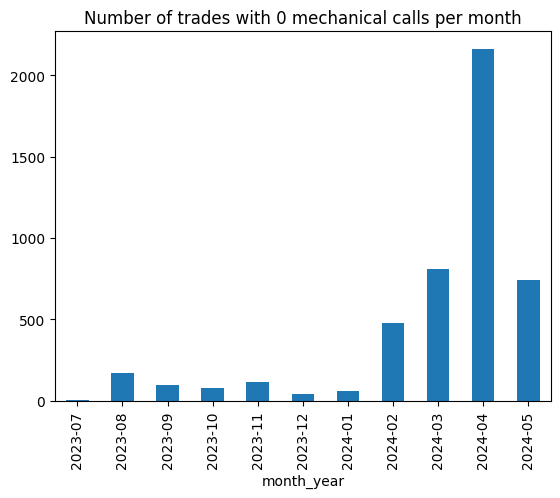

In [5]:
all_trades_0.groupby('month_year').size().plot(kind='bar', title='Number of trades with 0 mechanical calls per month')

In [20]:
all_trades['num_mech_calls'].value_counts()


num_mech_calls
1      24156
2      18109
3      12146
4       7685
5       5353
       ...  
185        1
184        1
166        1
159        1
148        1
Name: count, Length: 111, dtype: int64

In [6]:
def get_trades_with_zero_mech_calls(num_mech_calls):
    if num_mech_calls == 0:
        return True
    else:
        return False


all_trades['zero_mech_calls'] = all_trades.apply(lambda x: get_trades_with_zero_mech_calls(x['num_mech_calls']), axis=1)

In [7]:
all_trades.groupby(['month_year', 'zero_mech_calls']).size().unstack()

zero_mech_calls  False  True 
month_year                   
2023-07             23      7
2023-08           1736    172
2023-09           5875     98
2023-10           5360     78
2023-11           3773    114
2023-12           8668     43
2024-01          13976     62
2024-02          15014    476
2024-03          14757    810
2024-04           8468   2160
2024-05           4395    742

In [8]:
all_trades.groupby(['month_year'])['trader_address'].agg(lambda x: x.nunique())


month_year
2023-07      1
2023-08     40
2023-09     50
2023-10     36
2023-11     37
2023-12     38
2024-01     52
2024-02     60
2024-03     58
2024-04    119
2024-05    132
Freq: M, Name: trader_address, dtype: int64

In [10]:
all_trades_0.groupby(['month_year', 'trader_address']).count()['trade_id'].unstack().T.sort_values('2024-04', ascending=False)[:20]

month_year                                  2023-07  2023-08  2023-09  \
trader_address                                                          
0x2dd9f5678484c1f59f97ed334725858b938b4102      NaN      NaN      NaN   
0x1665a7432fdc6557c4a2385cc9f458302300583b      NaN      NaN      NaN   
0xc83037dd1c876e2b3c38257372b70d0fa3b41079      NaN      NaN      NaN   
0x2fae80e1418d9ce9806d61dc3368447247221aa6      NaN      NaN      NaN   
0xc918c15b87746e6351e5f0646ddcaaca11af8568      NaN      NaN      NaN   
0xf4429de7007e82fdc1e516767a0366e4d8d573d2      NaN      NaN      NaN   
0x89b0648e2dd0cb3e98f72873f1fdec1e0f5ea72e      NaN      NaN      NaN   
0x7f429730d530e7514fe5e40873b931096c403b53      NaN      NaN      NaN   
0x3666da333dadd05083fef9ff6ddee588d26e4307      NaN      NaN      NaN   
0x220e814643627f4bc70814af90e6a6b29433d685      NaN      NaN      NaN   
0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736      NaN      NaN      NaN   
0xe593acc8a255d3d0241c308ec1320bbdbc432981      NaN      NaN      NaN   
0xe7aa88a1d044e5c987ecce55ae8d2b562a41b72d      NaN      NaN      NaN   
0x18f8f8a755b4e4cc0f8fac2c15a888247954a0e5      NaN      NaN      NaN   
0xa8efa5bb5c6ad476c9e0377dbf66cc41cb6d5bdd      NaN      NaN      NaN   
0xb611a9f02b318339049264c7a66ac3401281cc3c      NaN      NaN      NaN   
0xe7715def604bccfb93f34ccaf3610ed6ee9c6741      NaN      NaN      NaN   
0x0e84150ded38d87ab4d2571d178293749982e5ff      NaN      NaN      NaN   
0x05a4ed2367bd2f0aa63cc14897850be7474bc722      NaN      NaN      NaN   
0x99fd0c09192094c2a9020235e97a7064c2b0ea5e      NaN      NaN      NaN   

month_year                                  2023-10  2023-11  2023-12  \
trader_address                                                          
0x2dd9f5678484c1f59f97ed334725858b938b4102      NaN      NaN      NaN   
0x1665a7432fdc6557c4a2385cc9f458302300583b      NaN      NaN      NaN   
0xc83037dd1c876e2b3c38257372b70d0fa3b41079      NaN      NaN      NaN   
0x2fae80e1418d9ce9806d61dc3368447247221aa6      NaN      NaN      NaN   
0xc918c15b87746e6351e5f0646ddcaaca11af8568      NaN      NaN      NaN   
0xf4429de7007e82fdc1e516767a0366e4d8d573d2      NaN      NaN      NaN   
0x89b0648e2dd0cb3e98f72873f1fdec1e0f5ea72e      NaN      NaN      NaN   
0x7f429730d530e7514fe5e40873b931096c403b53      NaN      NaN      NaN   
0x3666da333dadd05083fef9ff6ddee588d26e4307      NaN      NaN      NaN   
0x220e814643627f4bc70814af90e6a6b29433d685      NaN      NaN      NaN   
0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736      NaN      NaN      NaN   
0xe593acc8a255d3d0241c308ec1320bbdbc432981      NaN      NaN      NaN   
0xe7aa88a1d044e5c987ecce55ae8d2b562a41b72d      NaN      NaN      NaN   
0x18f8f8a755b4e4cc0f8fac2c15a888247954a0e5      NaN      NaN      NaN   
0xa8efa5bb5c6ad476c9e0377dbf66cc41cb6d5bdd      NaN      NaN      NaN   
0xb611a9f02b318339049264c7a66ac3401281cc3c      NaN      NaN      NaN   
0xe7715def604bccfb93f34ccaf3610ed6ee9c6741      NaN      7.0      NaN   
0x0e84150ded38d87ab4d2571d178293749982e5ff      NaN      NaN      NaN   
0x05a4ed2367bd2f0aa63cc14897850be7474bc722      NaN      NaN      NaN   
0x99fd0c09192094c2a9020235e97a7064c2b0ea5e      NaN      NaN      NaN   

month_year                                  2024-01  2024-02  2024-03  \
trader_address                                                          
0x2dd9f5678484c1f59f97ed334725858b938b4102      NaN     32.0    240.0   
0x1665a7432fdc6557c4a2385cc9f458302300583b      NaN      NaN      NaN   
0xc83037dd1c876e2b3c38257372b70d0fa3b41079      NaN      NaN      NaN   
0x2fae80e1418d9ce9806d61dc3368447247221aa6      NaN      NaN      NaN   
0xc918c15b87746e6351e5f0646ddcaaca11af8568      NaN      NaN      NaN   
0xf4429de7007e82fdc1e516767a0366e4d8d573d2      NaN      NaN      NaN   
0x89b0648e2dd0cb3e98f72873f1fdec1e0f5ea72e      NaN      NaN      NaN   
0x7f429730d530e7514fe5e40873b931096c403b53      NaN      NaN      NaN   
0x3666da333dadd05083fef9ff6ddee588d26e4307      NaN     

In [11]:
all_trades[all_trades['trader_address'] == '0x2dd9f5678484c1f59f97ed334725858b938b4102'].groupby('month_year')['trade_id'].count()

month_year
2024-02     32
2024-03    240
2024-04    180
2024-05     59
Freq: M, Name: trade_id, dtype: int64

In [6]:
from datetime import datetime
from gql import Client, gql
from gql.transport.requests import RequestsHTTPTransport


import pandas as pd
from datetime import datetime
import requests
from typing import List, Dict, Optional
from requests.adapters import HTTPAdapter
from requests.exceptions import (
    ReadTimeout as RequestsReadTimeoutError,
    HTTPError as RequestsHTTPError,
)
from tqdm import tqdm
from urllib3 import Retry
from urllib3.exceptions import (
    ReadTimeoutError as Urllib3ReadTimeoutError,
    HTTPError as Urllib3HTTPError,
)

### Subgraph to get requests and delivers data

In [7]:
def fetch_all_requests(api_url: str, timestamp_start: int, timestamp_end: int):
    """fetch_all_requests fetches all requests from the subgraph within the specified timestamp range."""
    transport = RequestsHTTPTransport(url=api_url)
    client = Client(transport=transport, fetch_schema_from_transport=True)

    # GraphQL query with placeholders for variables
    query = gql("""
        query MyQuery($current_timestamp: BigInt!) {
            requests(
                orderBy: blockTimestamp, 
                where: {blockTimestamp_gt: $current_timestamp}, 
                first: 1000
            ) {
                blockNumber
                blockTimestamp
                id
                ipfsHash
                requestId
                sender
                transactionHash
            }
        }
    """)

    all_requests = []
    current_timestamp = int(timestamp_start)

    while True:
        # Variables for the query
        variables = {'current_timestamp': current_timestamp}

        # Execute the query with the specified variables
        result = client.execute(query, variable_values=variables)
        requests = result['requests']

        # If no more data is retrieved, or the last item's timestamp reaches the end timestamp, break the loop
        if not requests or int(requests[-1]['blockTimestamp']) >= timestamp_end:
            break

        # Extend the result list
        all_requests.extend(requests)

        # Update the current_timestamp to the last item's timestamp to fetch the next batch
        current_timestamp = int(requests[-1]['blockTimestamp'])
        print(f'Fetched {len(all_requests)} requests')
        print(f'Last timestamp: {datetime.fromtimestamp(current_timestamp)}')

    return all_requests


def fetch_all_delivers(api_url: str, timestamp_start: int, timestamp_end: int):
    """fetch_all_delivers fetches all delivers from the subgraph within the specified timestamp range."""
    transport = RequestsHTTPTransport(url=api_url)
    client = Client(transport=transport, fetch_schema_from_transport=True)

    # GraphQL query with placeholders for variables
    query = gql("""
        query MyQuery($current_timestamp: BigInt!) {
            delivers(
                orderBy: blockTimestamp, 
                where: {blockTimestamp_gt: $current_timestamp}, 
                first: 1000
            ) {
                blockNumber
                blockTimestamp
                id
                ipfsHash
                requestId
                sender
                transactionHash
            }
        }
    """)

    all_delivers = []
    current_timestamp = int(timestamp_start)

    while True:
        # Variables for the query
        variables = {'current_timestamp': current_timestamp}

        # Execute the query with the specified variables
        result = client.execute(query, variable_values=variables)
        delivers = result['delivers']

        # If no more data is retrieved, or the last item's timestamp reaches the end timestamp, break the loop
        if not delivers or int(delivers[-1]['blockTimestamp']) >= timestamp_end:
            break

        # Extend the result list
        all_delivers.extend(delivers)

        # Update the current_timestamp to the last item's timestamp to fetch the next batch
        current_timestamp = int(delivers[-1]['blockTimestamp'])
        print(f'Fetched {len(all_delivers)} delivers')
        print(f'Last timestamp: {datetime.fromtimestamp(current_timestamp)}')

    return all_delivers

In [8]:
api_url = "https://api.studio.thegraph.com/query/57238/mech/version/latest"
timestamp_start = int(datetime(2024, 1, 1).timestamp())  # Start timestamp
timestamp_end = int(datetime(2024, 4, 30).timestamp())  # End timestamp
requests_data = fetch_all_requests(api_url, timestamp_start, timestamp_end)

Fetched 1000 requests
Last timestamp: 2024-01-03 09:40:15
Fetched 2000 requests
Last timestamp: 2024-01-04 19:23:30
Fetched 3000 requests
Last timestamp: 2024-01-06 04:07:45
Fetched 4000 requests
Last timestamp: 2024-01-07 05:26:15
Fetched 5000 requests
Last timestamp: 2024-01-09 02:33:05
Fetched 6000 requests
Last timestamp: 2024-01-09 12:46:10
Fetched 7000 requests
Last timestamp: 2024-01-10 16:11:40
Fetched 8000 requests
Last timestamp: 2024-01-11 09:37:00
Fetched 9000 requests
Last timestamp: 2024-01-12 19:22:15
Fetched 10000 requests
Last timestamp: 2024-01-13 05:06:15
Fetched 11000 requests
Last timestamp: 2024-01-15 17:16:40
Fetched 12000 requests
Last timestamp: 2024-01-16 17:55:30
Fetched 13000 requests
Last timestamp: 2024-01-17 19:18:20
Fetched 14000 requests
Last timestamp: 2024-01-18 10:35:25
Fetched 15000 requests
Last timestamp: 2024-01-19 08:08:00
Fetched 16000 requests
Last timestamp: 2024-01-19 22:53:25
Fetched 17000 requests
Last timestamp: 2024-01-22 20:06:15
Fetche

In [9]:
api_url = "https://api.studio.thegraph.com/query/57238/mech/version/latest"
timestamp_start = int(datetime(2024, 1, 1).timestamp())  # Start timestamp
timestamp_end = int(datetime(2024, 4, 30).timestamp())  # End timestamp
delivers_data = fetch_all_delivers(api_url, timestamp_start, timestamp_end)

Fetched 1000 delivers
Last timestamp: 2024-01-03 09:41:05
Fetched 2000 delivers
Last timestamp: 2024-01-04 19:24:45
Fetched 3000 delivers
Last timestamp: 2024-01-06 04:10:20
Fetched 4000 delivers
Last timestamp: 2024-01-07 05:29:00
Fetched 5000 delivers
Last timestamp: 2024-01-09 02:35:55
Fetched 6000 delivers
Last timestamp: 2024-01-09 12:55:30
Fetched 7000 delivers
Last timestamp: 2024-01-10 16:30:30
Fetched 8000 delivers
Last timestamp: 2024-01-11 09:55:30
Fetched 9000 delivers
Last timestamp: 2024-01-12 19:40:45
Fetched 10000 delivers
Last timestamp: 2024-01-13 05:22:30
Fetched 11000 delivers
Last timestamp: 2024-01-15 17:55:25
Fetched 12000 delivers
Last timestamp: 2024-01-16 18:34:50
Fetched 13000 delivers
Last timestamp: 2024-01-17 20:28:45
Fetched 14000 delivers
Last timestamp: 2024-01-18 17:49:20
Fetched 15000 delivers
Last timestamp: 2024-01-19 10:48:05
Fetched 16000 delivers
Last timestamp: 2024-01-19 23:44:35
Fetched 17000 delivers
Last timestamp: 2024-01-22 20:27:10
Fetche

### Get requests content from ipfs

In [18]:
requests_df = pd.DataFrame(requests_data)

In [19]:
N_IPFS_RETRIES = 2
BACKOFF_FACTOR = 0.5
STATUS_FORCELIST = [404, 500, 502, 503, 504]
HTTP_TIMEOUT = 10
IPFS_ADDRESS = "https://gateway.autonolas.tech/ipfs/"
IPFS_REQUEST_LINK = IPFS_ADDRESS
IRRELEVANT_TOOLS = [
    "openai-text-davinci-002",
    "openai-text-davinci-003",
    "openai-gpt-3.5-turbo",
    "openai-gpt-4",
    "stabilityai-stable-diffusion-v1-5",
    "stabilityai-stable-diffusion-xl-beta-v2-2-2",
    "stabilityai-stable-diffusion-512-v2-1",
    "stabilityai-stable-diffusion-768-v2-1",
    "deepmind-optimization-strong",
    "deepmind-optimization",
]

In [20]:
def get_requests_ipfs_content(ipfs_hash: str) -> Optional[Dict]:
    """Get IPFS content from the specified IPFS hash with retries and timeout."""
    session = requests.Session()
    session.mount('https://', HTTPAdapter(max_retries=Retry(
        total=N_IPFS_RETRIES,
        backoff_factor=BACKOFF_FACTOR,
        status_forcelist=STATUS_FORCELIST,
    )))
    
    response = session.get(f"{IPFS_ADDRESS}{ipfs_hash}/metadata.json", timeout=HTTP_TIMEOUT)
    response.raise_for_status()

    return response


def get_delivers_ipfs_content(ipfs_hash: str, request_id: str) -> Optional[Dict]:
    """Get IPFS content from the specified IPFS hash with retries and timeout."""
    session = requests.Session()
    session.mount('https://', HTTPAdapter(max_retries=Retry(
        total=N_IPFS_RETRIES,
        backoff_factor=BACKOFF_FACTOR,
        status_forcelist=STATUS_FORCELIST,
    )))
    
    response = session.get(f"{IPFS_ADDRESS}{ipfs_hash}/{request_id}", timeout=HTTP_TIMEOUT)
    response.raise_for_status()

    return response

In [26]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def fetch_ipfs_content(row):
    try:
        ipfs_hash = row['ipfsHash']
        response = get_requests_ipfs_content(ipfs_hash)
        return {
            'prompt_request': response.json()['prompt'],
            'tool': response.json()['tool'],
            'nonce': response.json()['nonce']
        }
    except Exception as e:
        print(f"Error fetching IPFS content for request {row['requestId']}: {e}")
        return None

def update_row(row):
    result = fetch_ipfs_content(row)
    if result:
        row.update(result)

rows = [row for _, row in requests_df.iterrows()]
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(tqdm(executor.map(update_row, rows), total=len(rows)))

for i, result in enumerate(results):
    if result:
        requests_df.iloc[i].update(result)

  7%|▋         | 13417/196000 [31:54<5:29:32,  9.23it/s] 

Error fetching IPFS content for request 13825813273711797497112452608307201680555393326362213620973836331653161080152: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220be696918656e5d846e75b2f477308ad6825bbc8bcfb360abd7ef614f2b977c30/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 35727069124499649100424841146789196343122034717560557039716930760771966449491: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d13dab39b98df80516e5854c8d88b70c07c2ff07b978243cb6383221fb53c70c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75534657934389915301925172407482127992698564142524531848803752672099544538379: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122008769822edfdbad92a973d755e8386b141656ae5b04c6

  7%|▋         | 13422/196000 [31:57<8:38:55,  5.86it/s]

Error fetching IPFS content for request 84334234363553512469928750554288201549477318244001661949795060577523179268147: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200fe022d381368c9d55c40f98716ad721664a64f6ec43070fd22d259cca9687c6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 1242912688596085592304349727393142135971320939962601932827769317188910679574: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200413521057f134e50291afc64a838051a2db1291154b48be1ca7aa0541a80026/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13444/196000 [31:59<6:29:58,  7.80it/s]

Error fetching IPFS content for request 29899127561935683976127724513969124337038748375241101159032311353189676598158: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122051cd11397ca62d9cfce4d3e6106f58cb9818e6e907935b267f8dfc78b02e5c56/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13453/196000 [32:00<6:30:40,  7.79it/s]

Error fetching IPFS content for request 80163506857400115477761822923551866879215427231764710272677931444378451905905: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122063621fa462a4ffdd861183de9a7e49d5713c39bb92e8321785e071d63da90d6e/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13464/196000 [32:01<6:23:21,  7.94it/s]

Error fetching IPFS content for request 96554002891591816623028738767216941118438359626400881158602906446325409610029: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122096d6384703e3ed02c0f20645fa7e9f7b70525a20d8a719d10cde075fd982966f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 24317946522950049675778295799565246843083865542589623647301197999441644382311: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207a8053032466dad927181dbb90198c9da0d94d5907d4e03b09b89c8e607c958d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 105944471279577758594192653582241848979426818417694374311510647877273611423031: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204d742dc071d959d10f61cbec4b46dc7d101d6e949e75

  7%|▋         | 13466/196000 [32:04<10:17:57,  4.92it/s]

Error fetching IPFS content for request 13233849400263402321874075901991253583463712401354743930974460599826678220550: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c20383db643c452e33336b6f9fdf9d9ed5c8ca66a37a7e5527aac5fe9fa7b626/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 83782208890199173660285849777766006288689505769145787224091810702104460351871: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ce7cf9e1003435401962e56b095201992036d332f87aae7f470b5c95acb27dae/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13485/196000 [32:06<8:01:54,  6.31it/s] 

Error fetching IPFS content for request 113856185213703537545689609949520528676095045239868141492442090417157255189916: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220616c6305762245c93d5c003266cb64138752e87219caa4629c66bfef171b228d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89989937838936127611759916794048556728658226017618988106679605294514021904634: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207657a2d269014ac8ae0bd24af2125eebbb1ad290d75312a557673eef305d1546/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 70335773168149926651260214724049751781560358991975722369689242235270113240850: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f0ece624c607b6072da02bf77e99b4c4993a75594a49

  7%|▋         | 13488/196000 [32:08<10:00:12,  5.07it/s]

Error fetching IPFS content for request 111181507813353847543341665872646542728088438506694878194175899496656653980840: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b508998bb15605402459ddda125855bd8f0d083e540aabf0f9637d894ae9de57/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13503/196000 [32:09<7:35:08,  6.68it/s] 

Error fetching IPFS content for request 42646382378090545514743960817914126534316978746095672787464460954226941569453: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ff6b9b3861c1105d6ff699b63f1b822e640735cd9ea119f35f0ab1a926f804b0/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13508/196000 [32:10<8:43:14,  5.81it/s]

Error fetching IPFS content for request 99067557069749521140722607698899205125278596767951176665079721528580950091487: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207f077e4c3ce185cc17ba751cf5418aeada5d320d78bb9e3d31194f7be8e0cfb7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 57098207664927397048021305597861789709145789531368957739695416798788867992298: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220adf2655959204227a3af4c398c7e4aa139d8bb8a032f1d12b8d7b4c575083aa2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 115695711227748975297738334576162620180023719882969106902923267028185687341054: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200469bf760896b150528a5431b209af63096f4c474d2f

  7%|▋         | 13515/196000 [32:13<11:26:37,  4.43it/s]

Error fetching IPFS content for request 70755591607485657674379966633065329739870216648483612964244917204169792854832: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220958720e351bc2c647210c7e5c13f51eed8ee9b8e9d7b036926762c449172f1f0/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13518/196000 [32:13<10:28:46,  4.84it/s]

Error fetching IPFS content for request 82857655483237804435054594720380233242476913941211860175118714074992783639741: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b9f8fe83e95e63339957419282ce4b567187a1bb072aa04fe9303d88ed878c74/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 64599898839970459748684624688257886313085009129045680490764801346336313328039: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220394f512417dd66c7b06bec6026f7c0b195d69e2ec4eb29cfc9ccdad6c4f580d4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13523/196000 [32:15<11:44:26,  4.32it/s]

Error fetching IPFS content for request 54867508950935396708639008585802328454707421108861477288336633104024309100213: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208440cab6b2f0d4b51ba91929c2ffb017105ed6448795c3fc34a7bb69acfb20fc/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 544040391914802056028314221673720179827842444136592798520832555642529283008: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207cc4a63eb1bd73448f82eed44289424984561d62c4213ac70d5c42c1656b2ab7/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13535/196000 [32:16<7:44:30,  6.55it/s] 

Error fetching IPFS content for request 91181600998134832771514924381536594975187039199356302164040955950033241822371: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122025e8e29c22bff53e2894313a044cba8768c2a66f32498431e5fffd14b971257b/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 3459971759337905510145800664410866568770981483343196485719369666215576838960: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ce55589e1e7d6fdf8db798e7db054401f691d9613c310b18815571f2140688b6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13543/196000 [32:16<5:33:31,  9.12it/s]

Error fetching IPFS content for request 55073382749587102233932836814799241404216401180848758206467765319975319404975: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f4f8becc5a83a13204b5cfbc827ddb1651d6053e45e238c30cf944b567179336/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 13546/196000 [32:17<6:59:20,  7.25it/s]

Error fetching IPFS content for request 106525830200600522230013744685260617769741111446921239669148788609353394948833: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b96cc3ae5e495ace61464b61b2ac8fdf9527b9145d7b3447bc433fea9e6e3af4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14042/196000 [33:26<10:36:30,  4.76it/s]

Error fetching IPFS content for request 81929996200616492442266300510873830815941869743101642797477588980267532011894: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205e3b317c371a9d209c4326d85e19c70fe67769652cd1603dd6fe3507f6579285/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 71252240512793603011196812775142850556193870942382487474536168510030129290620: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e24ddb0f71dfb23137829a70be026b68f7cabf7ce3db5d9b20fa81cb44273a8b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14058/196000 [33:27<7:25:52,  6.80it/s] 

Error fetching IPFS content for request 87914840037846146557226667866457133208285487024296639646134374983956730785581: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a8f3ede59543e152c72df4e6c82e506233e12c06beb0fe6ee9fea49a352a8ef7/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14069/196000 [33:27<5:25:02,  9.33it/s]

Error fetching IPFS content for request 66493483234361957003988620216296384835818992170592619363833713796205727981233: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d6587411e8b44c740687c28059299b2e1c5ce8da7019e95d5077773ed65909eb/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14072/196000 [33:28<7:20:05,  6.89it/s]

Error fetching IPFS content for request 39992144914938569326855471836409783140987822499599405071511213942750486496914: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122062de6604f2595f2bb4149d225ded214f80426fe2310155b6940d0faef735feaa/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 52422856190788023076880432803428475065355703945036207522106081112253834626727: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b43aca37354b7c30a22f7f4f47b6a1a017ed18d2831a4bc596c4c75cc72cb5ae/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 92770131078134542913803453945805526834963248015916775511863006775204314234723: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208a03e135913e8a424be9ec82770be56aba989533b3106

  7%|▋         | 14074/196000 [33:31<12:27:51,  4.05it/s]

Error fetching IPFS content for request 17606094272858172868873320330266349855514403187290206210139920537450437180025: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122072f894710e68a8bb2b8256d7663df045f6b858edd5ae98887329a7f8f94c7905/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14088/196000 [33:31<7:21:08,  6.87it/s] 

Error fetching IPFS content for request 31767662643493170345732675734082470505916112665609767251279924874828718773059: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203bf9200be42318207e8bb4aa7726c19c426781f6ad2520cfc4a12065a6caabc4/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 78128351690360260758166310543052610449398617271605991878200628359504151022490: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220276b6fadb6972e53d6909adaea7b686838b538c751b3919abff0e9ac056bbeef/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 43244811993731028538004742863914108561163676990064925311528792009227150561409: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bb99fb9deaa9e50240cb65e6736bfd686055e37746513

  7%|▋         | 14092/196000 [33:33<9:20:56,  5.40it/s]

Error fetching IPFS content for request 2497610634249446738067509447460825529866613219083464030928750019059698037757: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203a7fd810a2cd0ef50799bcf323ae547557afa03eae1a8a389dd4c7be8a9fab1d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14108/196000 [33:34<5:51:17,  8.63it/s]

Error fetching IPFS content for request 81995559606461455853519654956044465127273379482786082009180697451815170810743: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a362d125ae7c15eca2f2dd19e3077db4c7b5e78f3b4a1b579085d48f881a6149/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 96979871762438839839001517444774514595517270492699164808182346115059775779559: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220adaca585becaeedbddd9610f37608b30bb231177eb718163f09e08e49992722e/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14110/196000 [33:37<12:41:50,  3.98it/s]

Error fetching IPFS content for request 91595593588797371850157321508297462292489323257511872467806417425714313643738: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220724ff99f97f8d32b2c95962378c5969d7f75232b38100666d0f4b3f1fb84f583/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14130/196000 [33:38<7:30:29,  6.73it/s] 

Error fetching IPFS content for request 31922550057002466472948646445393057650996088720712776218338210834052618196183: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220700a93ac2f9b49ad604ac146c7a3b8fe755f51c1f2a74ee7e5bb7af85edba3b4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14148/196000 [33:40<5:45:56,  8.76it/s]

Error fetching IPFS content for request 105822304413889117584637314033640442146778941191932028558321397300249749924821: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122067e1ccd51466d586427977e3e0f5045ab39bddc5b9cc418414cc34f02a728d6d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14152/196000 [33:42<9:52:04,  5.12it/s]

Error fetching IPFS content for request 115000900663507983091436142707773185058977052067713864587531472267699491808005: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f9db8158c9de54c9ffacede2e00b29168b59f057f75e9080cae827846d8acd9a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 112346148196454850104868649697425907122662060275712102062877562209400259418267: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206e34cffbd7ebe0bd1a6c43808f4b0b591b090b303c150f9f84241b0cb1f4e9ba/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14181/196000 [33:46<7:09:45,  7.05it/s]

Error fetching IPFS content for request 92706537993965984641523590434273985369467653471924486011988223164104381708374: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220da6843c7f520a25439fd1f7b930e6fb63cea666cb909e77677af29d3f0002a4c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14192/196000 [33:47<6:07:19,  8.25it/s]

Error fetching IPFS content for request 39527617410327591688357927887275503990662597360969291335027964343869265898288: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209c1ebf7d50dd19b691cd3f94abaf80139a826d9de3dc882a47970f64ae3e2f5f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14194/196000 [33:47<6:51:46,  7.36it/s]

Error fetching IPFS content for request 99131922964535449255504013091133899569811830916575003413117861000562066200962: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204d956b2bbebb6da60feaf3e3d683ccae46a5b0408b34bd707b818a1038efb4d4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14195/196000 [33:48<9:24:50,  5.36it/s]

Error fetching IPFS content for request 3600562371408982443586901016903989680400215833965146449330694339737555667230: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b2812b7a0568c02162bc57c6b1ae23d0963abfcd0ffd6a5868c466240bfdb6e4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14200/196000 [33:49<9:15:59,  5.45it/s]

Error fetching IPFS content for request 65647893674666221463092900380972312290431361301310547724872523995070199782539: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208fefca2eaa639bf23c0b453212d06bc6aecc0813a70272b012c758022006b131/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14207/196000 [33:51<11:14:45,  4.49it/s]

Error fetching IPFS content for request 68957841854998919910422605567715648549158343762327147053548504518792103728173: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dc11f19b210c8c8d9c3f5e7b3b384a9549b4047dc35fcb8f6f53e53c305df28b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14215/196000 [33:52<9:45:34,  5.17it/s] 

Error fetching IPFS content for request 113354217547814278335883344420941852867444491953885277252537260886233863885911: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ecb1e2a18ce8a3f7f148942bab1c6d937b6317fc14d5f21c5244d56785b6b9e2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 47647082679869882425186354005472503799585743721153637135556783774827188293886: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220305f6bef7ede34b5470afc8bc68e60a9bac339ea0ba343259604bb42f80bd839/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14225/196000 [33:53<6:32:49,  7.71it/s]

Error fetching IPFS content for request 607167790221519790572877114605035216282356802160200898398520443047561117411: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122085a137f467aaf80e452388e221a9e0120cd16768d1725ac69c91d0d3b5081a12/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 70525002134060359238101746527788722407489161002641822807808357074727091376091: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a79eefc0e970f2c85222085563568be54032906dde4fcfe77608def0f188b018/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14227/196000 [33:54<8:03:46,  6.26it/s]

Error fetching IPFS content for request 2174652326746892336388007246543635788074299448853669281489051127622488165206: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b16042c74676d897acfa6afb0939544899ea67c1105c34ddcb0bce3850e3fb16/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14232/196000 [33:55<8:45:55,  5.76it/s]

Error fetching IPFS content for request 84319405419916973428114294270523334951427453553662656281628961048822235819256: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200c3d957fffc206c94a51b67e898ca824289337454f70e72750ecef5fa359f189/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14235/196000 [33:56<10:01:25,  5.04it/s]

Error fetching IPFS content for request 11289694230912722373837719903130204416386794917015087524910629318717444075865: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b35512e36b13c1ab31413cb89be047a7cbd4c94dc8517200b5b55245fb55268c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14239/196000 [33:56<8:38:13,  5.85it/s] 

Error fetching IPFS content for request 93499278449396205649287157099389947238836635602646635103251265175476333949149: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208fd9a8c41daacd653bdae73432c91eeb6927cfaa031b9aa4e9f35bb2c7bf8554/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14244/196000 [33:56<6:44:18,  7.49it/s]

Error fetching IPFS content for request 96440732893231587486368203953835005863357305342859461649552638822021924815349: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206dbc135c9544d1d84dd930a7acee7ac429efb17ece1571e47b2ff6b7ef9f67e8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 43155071194977444023734999287989042658511476893030875416572838387997062962860: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209ca2072a2f4ab2d6b7d76a9dbeb7f957f7b7c5b6e566b52c9e06c945e7e38027/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 22437002319451196598451370215037123219515934346349497301874947454042865517552: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209125cf4476373ec7c8151ebf840211e4d49783901b0d6

  7%|▋         | 14247/196000 [33:58<10:18:33,  4.90it/s]

Error fetching IPFS content for request 47276102723004158295316707634990704127602296584819337635525643284796661086372: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209aa3a51b306be831bbf76ea83c9fe0d3fc725448337e73d505bd61ff6ee17744/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14253/196000 [33:58<7:29:52,  6.73it/s] 

Error fetching IPFS content for request 103089624498427131505846759845070898242671996084710192987777430391765825211166: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d3ec05abac601eb4c3d19350d2714b0baf738b4f4305cce1a43d339712c7e4ed/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14258/196000 [33:59<6:49:50,  7.39it/s]

Error fetching IPFS content for request 83533713175859833909580755010046930171428516818134197379488665187217475063547: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206f6924c1f1af1a70607524ef6bcddcec3f87de2d57bd0d8fbb4cce7e269725a2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14262/196000 [33:59<8:13:17,  6.14it/s]

Error fetching IPFS content for request 66421609747520137823541667095695217557409878570096411963273258035840305681161: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122028a681ae9108ba6bcd968335ee81f88e5e7dc5cefdddddb8d59425e9c7d5dfa2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14264/196000 [34:00<10:05:44,  5.00it/s]

Error fetching IPFS content for request 20805628194953326177780816292669306463535215172288884607391336413475268864209: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122023195b9552184fc7e02b5e90cead2277096fc174494cd3db5ca99e07b4f9dcdc/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14266/196000 [34:01<11:35:38,  4.35it/s]

Error fetching IPFS content for request 70434385787191995100505378058930277137612444378361877049642992968351793988880: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fb349e9f314b231147c70c38807b56a1c8d9f51062f32c8dff6b716fae695ba0/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 3344313800732918200682802461839687753009972412877170327130400474376284990383: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220918313c8455bdbee0ac737e4346a31862f8378dc3b04eb6afc980228e2ddc8c3/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 108609628102071828875285373674204981930756125985911788263216407024186451209972: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209f4b02131e1566eabbbe8a6cc108bfaf48e00aadb5f9b

  7%|▋         | 14268/196000 [34:03<20:12:27,  2.50it/s]

Error fetching IPFS content for request 108167828494543103990406771878662955225526040112901227284465390039334337157285: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a9720539aa34ff75430682c5bea0d12843647a52bbc0f2bac0813c14465c65df/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 25604105888404287567570019260802961915232862209496574485676397115552825706979: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122006a643686c7d6757df160e8933b2ad73b2af19dc6c3b3109d79db822b9fb5750/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14280/196000 [34:04<9:05:14,  5.55it/s] 

Error fetching IPFS content for request 85293060400978436040491892752716783506464338196234166053350770817446915454732: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b2b8dfb135e2b75a7dbf3400de8d481d3d8ef6258d1f33eeda1dbd5679c04a72/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 29116131282046392738054105038936273858419906830290638229099672721849742020812: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b1579b2527b54c65a25111b343d0ba4f757712cde0b38aba2c0cfd9f124223c6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 115773056143634687482499378192606345311706920239345162398325426611586230824252: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bb45d2e833607a5d26e3910def66d5d0631e431bbb8d

  7%|▋         | 14281/196000 [34:05<13:52:57,  3.64it/s]

Error fetching IPFS content for request 71681805405203722118690459710404631164290295229776914523116735958402743730657: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122015cd915acb6fe093401da1b2dfdedf1cfbc43eb79d87451e23f64d29ded330fc/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 72364939500932925294972421861698729919092585648435443600163667079370950210364: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220268d7d5c9d5a53efff9880a6b1e4fed98a86fcd72be53619391cc16639deaceb/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 57698168554856102298284565441369927256863367915481829311543801875078064878732: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200d1086cc901bdf86bbf245839800f8bee426fcd5301fe

  7%|▋         | 14283/196000 [34:05<13:25:35,  3.76it/s]

Error fetching IPFS content for request 105837986404425747630405545783976826194775042579777774947986247164167679088755: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fbb03bcc9d9ca29c38a1c09fd16b81b360405e01f9bc0027973c6876ca8abd25/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14286/196000 [34:06<11:56:21,  4.23it/s]

Error fetching IPFS content for request 85094482559366583999211003376151928844378286141892569805614131070884778922141: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122006ecddef297763a89568596fa63afb7653cbfb7aadbba99c65d7aaac4e72707e/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14289/196000 [34:06<10:07:32,  4.98it/s]

Error fetching IPFS content for request 66450461811677497092409254715555819168146237103956807219277613905579573575519: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122069523286b90598415a391986257733baf51779fa30e992494ac2588bacad0f97/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 88129047163220595228817999085732013273138844248715115893560754503657413609481: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c234c5e001e8c73c38139089208814841d6276cc95dbc264b6b65ac025d3c957/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 10742659675998691699738368594025882152195592481643289853847657458688620256573: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ef59fad00bca4a5b4bd9c9858d131170b643f3095ac7c

  7%|▋         | 14290/196000 [34:08<19:32:30,  2.58it/s]

Error fetching IPFS content for request 82512945897258004119656099975548476028498977495846308348087405531139504377375: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122056418bcaea112515dd856a8198e1ecca5d59eb1db9c1c65ed9c03e574650b712/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 82440100059315431207344620805759504452444972640253588173872381919047811222375: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203ae60cf5eb156f3943151f09e9f0cfc04b0724722510525bb732e8bc63c47c23/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 38530268844868958631526428586058331484379939526810161976747105246082075337953: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a3dcce4510bd1785315e84d5e7513c3ce2b369f5c9d03

  7%|▋         | 14295/196000 [34:10<17:44:01,  2.85it/s]

Error fetching IPFS content for request 113973632995419856551313330126981010416884105709678583520800453767750227841123: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b657177ea6ef582b3971d1cd6ff12ca2ee78bc01846b6994b3de18a57fe1877c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 55093331363653209209837990407362767675909376595130999198231105059054772897575: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122004598701b2bc6f11f74abb2969a10c0016519f6bf175b6329769388793195d24/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14304/196000 [34:10<8:53:33,  5.68it/s] 

Error fetching IPFS content for request 42559075307174858367392021691126557052058512038056538364990636918897099925816: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220379efbb77ba99e4d66eb1f2633b336f11ca11d3d2ebac2693547686d30191113/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 80125900480023475608759919461234502234841214677617834671771193798466616492140: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202a93b6d738589a6a9183b57945464ba3ada0cc87061c569d9d8f9d826f6eb57d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 3616794055434525910846910312200372796485807515384041732103685174575175616914: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d4e5d174c6a70ab7ae1b727dd96410c1a0427e8270062b

  7%|▋         | 14310/196000 [34:11<8:59:02,  5.62it/s]

Error fetching IPFS content for request 44394296237510466563829540655198681569760994439874736710104236637799601784626: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d4ad33081e802c722edb4ca654a91b9a2f49129d44619afc7cfe9ff79b270f2a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 48514711178108928969822709548450350555946317050524912178094574873090236082139: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220023dd8289cdc339b163a90898e6ab5ce9ca6c79e2fe93a8cd2bb6144f3466ee7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 95544546081738427661302968914839819241856617956803520448887293920523180212592: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122087349da2fb83f54556e9221c9b40e37a4e66f3e8b2817

  7%|▋         | 14311/196000 [34:13<17:31:36,  2.88it/s]

Error fetching IPFS content for request 57493090609908983218630071470773161358522031386031529083935936967226105744440: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d5d7e114dd04473f90880ff34958295a76b304ca645736a0c4c940a234a54483/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 47859668715670782722380443910680811696840268801645119371239802287990042059830: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122062d78b0c32575d78f6f331579b2a938c2c4a5b7be1804d77b5753ef4c501dd3c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 78568826082709559374380999166607112716222696946885425255826978662176395653116: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207bc84d0408ccba74ac49c7f60c4044f3b32d60786be7b

  7%|▋         | 14321/196000 [34:18<19:28:29,  2.59it/s]

Error fetching IPFS content for request 60766947818364060823663136710722274295194008260717573306387973703905111648840: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205fd40fe14674bd2a847670ba829bccbeee453124e6437f7734272f64cfbc3a82/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14343/196000 [34:19<10:08:02,  4.98it/s]

Error fetching IPFS content for request 97135855754519610045901915640428227362647419332004792717385425550143435995060: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220942bb1a693e9f49f8629edc710a72f76b61358b9068ebb010389a5024374d7c4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14349/196000 [34:21<10:51:24,  4.65it/s]

Error fetching IPFS content for request 8414699476279051266845033855319402221414119362428261524836813533711454897425: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208d238cbcc3eb5ec5f6ee9149a771e29a9ae2c5f49fd422f7736233ca7cf3679c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14354/196000 [34:22<10:05:30,  5.00it/s]

Error fetching IPFS content for request 2957223232503203946299510917132363989314142805098765298084916752893239929753: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122078da9244965f291979fadc6863cb7723b6c78de0204a44e5292ac7fd6421c790/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 100101416570989652696202877493596649712831881564959088330633878405882621562207: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cd76659cbdcb969b3b63f905bb2bf323308432392ea90b62c5b78e0304b216f2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14371/196000 [34:23<7:13:37,  6.98it/s] 

Error fetching IPFS content for request 75402386729691713148049131917994404588440477631084836493006391042626581023300: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b8158d0f9439812b18dd1330119a79aa0d8f08d68086db15c7f88d139f45d2c2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14375/196000 [34:24<9:18:04,  5.42it/s]

Error fetching IPFS content for request 28777060054565594489845291246106936928446230374643792861389118431882739105952: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a3679c4e0155b330b1119316d60001f1ab36fa6b6967759dc1dfe9e6ae704be7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 4743931212454929432238101054318460737385412908668581807635330296114466871721: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220db0705caf3c5b6bbb268114a35ebb315a5b5ba9364be3922038c645b21d6f206/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 103983534552417246674985013055599471333530249514734261732421178563745840808724: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122069ac5b6bc0b99e1a90f7d072669f10f777cb898393b28

  7%|▋         | 14389/196000 [34:26<7:49:05,  6.45it/s]

Error fetching IPFS content for request 43954121286225751661781305709292055492117305260044510493026803510390920122977: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f2236ff3c49ce53490d0fecdba5c39b729c456ed0ee4cba4966e3f4cf60e92d1/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14418/196000 [34:33<14:06:08,  3.58it/s]

Error fetching IPFS content for request 14669202577131742690939267040627495632117176782031989202674028057547141351474: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220022b213ced86d87a6c66c3af52856a3569f84c6ac7f6e156494bcb37e7de901d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14443/196000 [34:34<6:14:03,  8.09it/s] 

Error fetching IPFS content for request 122048462853117056105413876589287089580787323769327199006546353229583170479: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203a01f3858b9dfa53fd5622f936a2c95635757ca02f9369ba3e2d5034b705793d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14446/196000 [34:35<7:33:14,  6.68it/s]

Error fetching IPFS content for request 79292222195202293610884896123988742835035526505805536189262906540839035405773: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e54ebcc3e53e1699f1e356e1d24f073994b291800daeb362c681b1f1ef728c44/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 73944404894341550631732466888363824338561892610242418644085459928876313865593: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207a4268cbfda7be8c89f09e53d044738cf2faf8e293062ae3c3d638ec0ea5ab45/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14545/196000 [34:49<12:21:40,  4.08it/s]

Error fetching IPFS content for request 72550162731635325916087824023825831340148163294086660159334287969718938816788: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208b3ed8c2146b0beda5654b268c1794390b0877c5f3367a9219aee34bbbc1440e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 81080526582521270026547428326081517956356240135293914310845220680271220429216: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ee405edf44051fb1d7062904958e1b70b5a4e0929d50b96d99a1d86db1bbe0c5/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14566/196000 [34:51<7:12:45,  6.99it/s] 

Error fetching IPFS content for request 30116830194430003821833169835848697125692049772792187873222959157333274947524: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203bb7e5f0c5583bfa44c8ad2cdd7a18a5dfd5d29845c4371917c94ebe30d9819a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 45488146519878144092514808983645212978870359289120340894442665912031935651894: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205d764ddacffea064321668de7c27923a7ed4991dfee0ef9972564f2bdadd2d21/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54669716679512704275645712254387750321745956460870840383616646351019831133464: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220802ec6520ff4a4c8104d800f0fc7c314a13ac05aca9b0

  7%|▋         | 14568/196000 [34:53<11:10:14,  4.51it/s]

Error fetching IPFS content for request 33469314678989721751778715349621583600874127395968524657533925933812828615896: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205b13441f496528ced67141e56f54ecd88f0634125f6deec86c9139dcbb072d51/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 88593085856438128969383153672184439924083994823593643753061322404175503954822: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220db4f03d06d0383b4d2e48d9408f45ba6d61036eacdeb802a02e33ddca17cd299/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14594/196000 [34:55<6:31:28,  7.72it/s] 

Error fetching IPFS content for request 50098065142881028365526102543277173588040962599408584845009849744363952775525: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220eecee4398a2083a85fb6c35f36eca0b18a24d38e1cefd60565a894dd9a34d8ae/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14605/196000 [34:57<7:50:25,  6.43it/s]

Error fetching IPFS content for request 59640495033482256066601015884577050260941794919343279634770429939358869837881: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204c3f9bf05eaec4785182defa4f74acd857ec91dc1f96c3209bbe505ad58f142e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 7953236761244349414635547956887677316054087355478185277751940946474984064011: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201b5d4ee298e8117104e7688366058efc0e2fcb4d8c0d736ded718b8729d48e84/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14618/196000 [34:59<7:20:26,  6.86it/s]

Error fetching IPFS content for request 15557458229276292577562160262672838409550031224828696857902827446909710297459: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e7bb83433962b14ab88fccee2388574acc439f11cfc4c0f4f3e9e8d0a2c94f81/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14622/196000 [35:00<8:58:05,  5.62it/s]

Error fetching IPFS content for request 24298823450941388025761963385961261612029103234405264239309628017171092521222: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207aba5520cf0cd2686b7964d19e99965893b4d4a976606ab0b8ce8d2ae8bc74af/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14627/196000 [35:01<8:51:55,  5.68it/s]

Error fetching IPFS content for request 112544678624162053301459474342606579945729176974045410038204381041130785243959: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d8514ddfb6789e9328612bfd4b82a7d62af9a6b6ebc46d37f8f94b5e8b2ee0f6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 16558777441366898044384806870060692636849534251575187653805934994677071000920: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122074731949e4ec83f97b4cb98ea01a7d38192d1c222b49acfa63c013cba38e7024/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 6642633184549267462659271960332714200331189777812763902894579756687745280386: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208af8971a4bc987e20787a8765a6d9d2afd6dcaf99230a

  7%|▋         | 14638/196000 [35:05<14:11:22,  3.55it/s]

Error fetching IPFS content for request 49275551691658187387780904187544886468159750068614177340130411313811234674824: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220858cef5f745a8b0876c2bf4610562b2c4c79b6ac1b863617b8f6fd2299b10817/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 5788323484724672482590650324620251462254313048493460236939252449344162693803: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122056c49c8e7814468e9ea0fa6b4a5e3604c4c645d885245565fca25e86d3ae463d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14670/196000 [35:07<7:15:24,  6.94it/s] 

Error fetching IPFS content for request 104653509115903213515021738044014607713408340547441770353463409208756606428603: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201256ac14142a985bf3a8e17217f6be30a7d51b7e58f8b1040fe3e78e62f8881c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14678/196000 [35:09<8:17:46,  6.07it/s]

Error fetching IPFS content for request 81911141252950370597501687245250323420057605212938348043333181209569534848590: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205a93b6cc134e40e6a581f499e8786896879673b97ad010066b520ed97fc23caf/metadata.json (Caused by ResponseError('too many 404 error responses'))


  7%|▋         | 14693/196000 [35:10<5:57:17,  8.46it/s]

Error fetching IPFS content for request 81988131463326099201914505645999750269744898362819712549349385376105450538124: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204150a5c0158af964ca79d5d279ea006741d45f70a59d8d07fbe91df8e72017bc/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14703/196000 [35:12<6:49:07,  7.39it/s]

Error fetching IPFS content for request 75184196657769434358001652649306094367424808730103147678609611510152155729850: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220785462241d5db06a144279529acc9748fdb5ff4f5d5beaf67e56fdc783e399d5/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14716/196000 [35:13<6:55:40,  7.27it/s]

Error fetching IPFS content for request 53632190780333325897964373989612070562358506587429526127948803896670724972614: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ddab7a704730e2a01fc1c2867d6151b674b28129e510e95135e4332f7c75635c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14725/196000 [35:16<8:46:21,  5.74it/s]

Error fetching IPFS content for request 12800623154698788494750666786967049154235677688818627296982940935752315605633: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b7d2fb5275be7df994049ef70bb4e7c202f6e8cb98ad34f779949e3a643e3b0d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14738/196000 [35:17<6:23:13,  7.88it/s]

Error fetching IPFS content for request 58072628266559081064352470957480172482971028474655646896327626791475525937824: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122056345bc88cd286c146d6ad9be661b887df9922437ad100d02a7590330f27ffb1/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14742/196000 [35:17<6:44:58,  7.46it/s]

Error fetching IPFS content for request 68975969222126324312278231057029186477935528165379524748859088687926628036158: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201030340e88e66f85d29fce3eeb5a0d3e509fb40f0a346c2a0b8f24af78beea91/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14760/196000 [35:20<6:07:00,  8.23it/s]

Error fetching IPFS content for request 41322348559167450769289063700332903275917588521001160376391779870219621743917: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b236dbd0f9392ecce13728de6abba3d644bbf997b733c0d8590c5a81519aa386/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14761/196000 [35:20<6:26:15,  7.82it/s]

Error fetching IPFS content for request 97383351226357225438719346876768956321364734476537122625333310237596147104937: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202c6668b2096fa657a51c11da43820af4a119069160536adf0e8b80118d106616/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14765/196000 [35:21<7:37:34,  6.60it/s]

Error fetching IPFS content for request 71192386281635360005843792545593351902850876733392883012397532720225285665064: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b4cf3f1317e01b2c9053738399127576263dbe36cba40f00490748cff03ee27c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14774/196000 [35:21<5:40:50,  8.86it/s]

Error fetching IPFS content for request 98343526350372023469973721615893045155352563649231116699331307339127753336419: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202245fec7a0072fb293c24a6ce6876baa54827bff16410e79152ed5fe70301055/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14782/196000 [35:23<9:18:58,  5.40it/s]

Error fetching IPFS content for request 3501383645219034629952782328289336484999116708439117530918838714073903502489: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208460dafe6b0bdcb08308d34905c4e109fcbcdd0798a1c57cdbea7dadc9622be1/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 46976534691441677470006886431598308941463264103254835047982992184943016054725: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205965cf999f462a1c245e8147b72e7007a985313787e0bf323b7d597738c39d11/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14787/196000 [35:25<12:04:49,  4.17it/s]

Error fetching IPFS content for request 92737475339250392659486533341624284682378007235213065527833807739835479972617: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206e3a9581871eda87fd4a3d2b755175fcb8d9e4772c629a3c1ab6464130cf81fc/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 2100682315062182075144150091354592861148303728680091996311011512039414121755: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220726a7641d14acba36f6fe9d0798290e96d79156831b1ef0948b0cc1818dffc91/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14818/196000 [35:29<5:59:11,  8.41it/s] 

Error fetching IPFS content for request 369215152999871746048238120552748845061405293737769082222158000040831829971: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209880c281e8bb09e1e5c8bc403c80839ca1e79f1d95cfcede7e1f36bcc4025584/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 21710332677967170688616233125040932285876404446238303434857157227523201993537: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220065937a35b4a3b28917f2e68b251f6c08be8160e324f427d02bcbf5640815408/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14821/196000 [35:31<10:08:20,  4.96it/s]

Error fetching IPFS content for request 104354797596005792692917982463647342453006644525277858893947313113795212965900: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220879d53dba2c3925f5e2ab29e0d4741630595491940c97b793b469cb5eb971ca7/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14837/196000 [35:33<9:26:09,  5.33it/s] 

Error fetching IPFS content for request 105753631762624698091802493848929843229769699642510282384869750716216459430104: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220038a6ee26b18d3b01951d7103e36fb4018f56882f90e6962bd0a644c1928b561/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54588128525661129934397381271381513911467724622045567358402787730027555301222: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122053d34ab6a333926776c4566ad8b8068691d3aa37fa07b367b93c877225df1bd8/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14872/196000 [35:38<6:18:06,  7.98it/s] 

Error fetching IPFS content for request 114305970966574128913641735183063982848927982080640861394871012300891997847294: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122085ec711b799447e7604629b8dec828231a69024129e0bf7528375ebdce0b962f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14902/196000 [35:41<6:20:37,  7.93it/s]

Error fetching IPFS content for request 49575343338044458508817457422360848076733921665707056449376734266435951843625: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122013873906f1893e61fac14377619740a48d0e79101518fd0c456a9130fd1c62c2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 143919537864194739977955174170101441449573017424385559535201809998678692165: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205a517fa83f904b3aea3a4a87f1497725be3625237cacda27697c0ca4642c5939/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89587041305774621479638040854084788589629254952468307318879461855327997941501: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e1a5ffa19f783d784f82c5d6629485f703a18bb58b62789

  8%|▊         | 14917/196000 [35:44<7:22:14,  6.82it/s] 

Error fetching IPFS content for request 62087030121103203016992147722805760799249007977458472471493448512738150916241: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c74f7c001c64481f8186b203f435287e64fb2f56dda19203c09ad7c6e6767e76/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 88660378933286068116355716811688741978820945183150197192416942591268671336471: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e9b4dd79af773065bab073d058569f8aa86cd59e7a7742f28528e84a72f7927f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14920/196000 [35:46<9:51:06,  5.11it/s]

Error fetching IPFS content for request 86081261905287016256434526321588610833995510476477529396308331031551916463145: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122052be93908ef5f33bba36aa82517d07114d68ab4347fd89112939715be0009853/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 25087565347737323007816251132812267616273036132453978193076755951558074820800: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204f9763b1436abc6758dd5ec7db07aedb895029251f073d93ca2f3eb5b3fbe354/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14925/196000 [35:46<7:59:04,  6.30it/s]

Error fetching IPFS content for request 85716554797440100474813517488789907150712314042406380609340221560356839597758: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207dbe89667ef6d082b7a93f280148b0e0f9589ea6ad7277236b968974b5ab44af/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 98666017052468046001980644634088476987777828494238416104780410290113142063346: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207a2eba3a6dd8c1dbbba306234005180fa9fb4cced9777dabfff824e3499bc568/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 63844175617708602071691152483949075120820880869073216567989478168420409699926: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204cc8c8ddd756249a2aaa79131fa731148e1a13dadbd32

  8%|▊         | 14927/196000 [35:47<10:23:39,  4.84it/s]

Error fetching IPFS content for request 57058510692326844987405146917723719704858907507795152335163796984483647964078: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122080e0c2f6e2d27180991bea4809d2979d209416f52a810bf6a62fb27b7180b246/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 33884282010481078076654899711864788416641531117268640292113351728779002503207: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e6ccfe64721796f2e901162c718f6c9c459ccf49c1a293bc8d47ee90def57b82/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14931/196000 [35:48<9:09:39,  5.49it/s] 

Error fetching IPFS content for request 110714684052745278724318352665365352349904039052366141805083176531994526549467: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201d8408d0e6e2503496cdfeaa036f32bbdcad31460ff44048aee03f10af14b335/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 62716504908072416996200213286612016495198010741186239794588850752985440990962: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205b654fbf9ea867e58d9997a778c88e4c3f5f80a3facbec1d5adfce7382b8d727/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14933/196000 [35:48<9:40:32,  5.20it/s]

Error fetching IPFS content for request 40423569781449683748170358939906735334299755151820429953989906992432987868472: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205772c8a20a7294b0a4a426de6fc0ed028f3e1897c1c72d50f57cbeadb352a146/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 31339226352066723351211384215354921497483374335213995580962506073111984263220: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202f0f0d71d5fc2764133b1cae887db1db560870f8169f8fa5b11a598499e82da0/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 106166349615250528500036887560841663573652097138589448805940092138069510020692: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205fd002ccdcb6d0b5294cbfdf9d56f60f94d9ce2777e6

  8%|▊         | 14936/196000 [35:51<19:46:09,  2.54it/s]

Error fetching IPFS content for request 33105083314179029637046701594944049911324868683578451066893522841664411814974: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d28e5e023e54b9babb983313ae1d30788b4fa996733e8836abddf180abc69fe3/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 97888455540602910111874913161263668148210805181492002248855980302933041494151: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f0296aec8b84d280acc9ae07bd5bb5cad64819bafda6a76fe7f12a2241bc9b8a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 73045582053458601466265797243484452033610917598151238857382290300294457707284: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b3964c89b842b0111c818c19b559d09e0ce4eba27acec

  8%|▊         | 14944/196000 [35:52<14:36:45,  3.44it/s]

Error fetching IPFS content for request 44512365045157153187275764590241093779791499711797568586621302474870023623325: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220af6eb3b9430d054660496a345c51b1532dae768e0a90823289a0ede796da43fc/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14948/196000 [35:53<12:45:56,  3.94it/s]

Error fetching IPFS content for request 5211106496700200821806120695904924494378771752284109363719729161295858071741: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203ea957ea35ecef4f43208eb7b3cb959af42a16b88e17671a584302ff20e55acd/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54863590834707028721530874416314435553739830397452593432408476614436846975120: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220012234bf59e63855b5118d06a2011f92958a025beb5133f4216234dd883cf533/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14949/196000 [35:54<15:44:01,  3.20it/s]

Error fetching IPFS content for request 25513957614233487985908720124661657917813154289763606442874180499236683846927: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122080ce7437b9b4b97f5c685a123b0b0da652a4640bfe09ba140a407c320de8ec20/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 30505233583145012708662794166825968886678179873376722467598362707876418076642: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206e23687debd4cc2d69cbfb1ccb19ca4779d0ab167469f578d125d65633309d58/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14963/196000 [35:56<7:54:07,  6.36it/s] 

Error fetching IPFS content for request 21783698251057008034225164693012667318449300868947390176813440937754784026400: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220655ea350d999dbe34c61563f82145d90e8911473d5d56f57cf697b7477cac609/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 14989613306319295047298564848833165251331940977269778662419197500044067224254: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b3f48be3d65285a3d7a8e3e3d19e9fae0be38763c1cdf4c59e2b89b297550b3e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 76699383862066015504824280907439732349992814106225798449835771470328309736218: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201927e7663ed3de18dc13f4a1a26997fc3af17daf06149

  8%|▊         | 14966/196000 [35:56<8:58:41,  5.60it/s]

Error fetching IPFS content for request 25251278700858425791980115177902795436345911380906358563172540062246383182136: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201c96ffe8e0014f87c7d5a47622e241a60c3b2493d028751652ca2d89ee141207/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 65822040492614841785943345021278720803299287644363453252178525799060752923860: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a4e38e44e6c4b9182b7de8f728f6b1078dd6d91ed29799a3f1e1fc7cc522ac48/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 105795886781001494342746457790965999435432785815361433711843772552181266481781: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122089795c67460b2398cf598562b5b47a5e01e9aa9fa9f4

  8%|▊         | 14972/196000 [35:57<7:58:25,  6.31it/s]

Error fetching IPFS content for request 9293917102466895883791230696380552834412541733370480892565441412293332586460: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220513a1fc268ea74f634a3b470a47d821a8f7c50e8965636c24709f75a9657206d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14974/196000 [35:57<8:13:43,  6.11it/s]

Error fetching IPFS content for request 2043690879778352446684589031695402353295788637377244263787556175801519188655: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122037cf1707c5483f5094598a985e51f2f4ef847621e0219a54b18680f46ccbf09a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 48130967714797280221794235405824583077003874075295421383447808911688855483777: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201335d81d6a7b7455394ded5eddda043c3c963867b6c114e159f7dd8f34447f36/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 65494032937177637038666213761172874909907456932929576932624044993566335553772: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204f4b3dbe0aea8b07f2a1dde077e8a4f9e5cb7fe0335ecb

  8%|▊         | 14976/196000 [35:59<14:09:45,  3.55it/s]

Error fetching IPFS content for request 27024369805815836175945862056486772475000455145770736059187502981676615435562: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220979c84955840812944cd1a5f116b70d83d666fb3c54195a42540dc89bba1f48e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 50027511263171839030311859948985464565937509274794459768815843123970645126877: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220563fbb3cea753fc8c9b11543efd57d6042c8c1a0c5ae5d126f4f2b980a2051a8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 55372253190561262690516818473383537546474366594032978930769227237483709961244: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122026b344e30aa4f2191ec91ba44b1a887ecaf2af58b79db

  8%|▊         | 14978/196000 [36:00<16:42:59,  3.01it/s]

Error fetching IPFS content for request 30867000829692536993903005004595421046903775810686870613045996209252581983233: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ceb4224f0c1ae81ef1cdcd56858a603fd9c8798ddd1c2b84f4e4c4eab7a056ad/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 39526528155602460159429548470642009095612947250782431259773644732719942513521: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204b89bcf758bb7bef048738c6fdb55d48317ace64d509f49cb13565468f0765b0/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14984/196000 [36:01<10:37:32,  4.73it/s]

Error fetching IPFS content for request 24236681984923239695989447386754782537210781666157320002406279674447728424832: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ff316d9236afbe8c068195756c02dd4228b08985549d95f440cb24fb9a989812/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 76701225446231245227730285951729496294596765396463135112602403824767483265021: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220072168b21c9352b31ae98f4998728958a9eddef620420217e1feb7a8bf461c2a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 38564709580281911355705642002442884795324531283558831249231512554235548933818: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ed9388f1378a0930095dd4c024724450740f4435f3585

  8%|▊         | 14985/196000 [36:03<20:27:33,  2.46it/s]

Error fetching IPFS content for request 25352411505520709637431597603886689253831998864952968428902903649247865698032: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204f0aa33cb192ea92b82c226bae662a0b73a9213f111e109d91b06bb620d5f205/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 73079615362636433674922901104078396081352282014228572413365794668493432027120: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c903db2d43f609845adc5d311963839578cad9f6e98d126c9b75abbdf44a3977/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 108933120297405248551367448492077743201560032202784596955719841803835095417883: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205cd3f3a055a08c10994cbafd9c7e5aad6a13faa8e895

  8%|▊         | 14987/196000 [36:03<18:57:53,  2.65it/s]

Error fetching IPFS content for request 73936404270884546081006900808278246599235348658530340183915795289997652293686: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fcc65d2430b3399d1c0c95020298b22b5d8b2c128655341713f0de04af141fb0/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14994/196000 [36:04<11:45:00,  4.28it/s]

Error fetching IPFS content for request 97659754480999716136458076007102574568288084015035795968458145557772830971160: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122020e346e14d101dd59ea45395ef3acba27e136daf1065809fac44f06ec003b4c9/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14995/196000 [36:04<11:44:56,  4.28it/s]

Error fetching IPFS content for request 78322811906738109498384170755702776357276114178958534982293685377463845854888: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bd8a166899ce61b9bde4b4f75590daf2cae22dbf676dbd342a13a15171cc6edf/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 14996/196000 [36:05<16:00:10,  3.14it/s]

Error fetching IPFS content for request 99149380957585819892001182960476233121186123374918442089323641811248395030259: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f3ff0f62ae55fd93ca68225dad5f45a2739070a233d80d747bd12b162703bc92/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 110824459397247179233089999190745810902490534250339164704395912832376473877940: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122012a4d44f0d4f1b912eb19f319e3c204ebb1ef2d0902183ed87e8bd9be7374dbe/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 95511577836332832564112834630949331017456096138738769884779065661162337186794: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d91f396baf987e3be93c7b1f7f6399491d7e16ed01af

  8%|▊         | 14998/196000 [36:09<38:14:38,  1.31it/s]

Error fetching IPFS content for request 86182016185640586969993991657152579648269775103119490665044985378975594944574: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203fdd64d5cc47cb55d8042a7106de87a4a32e287fad198c7b5a72ed4b825f6925/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 27339516871219364914951977455678177353818455823057452251004899454480223064667: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200c35dba548e6b965f6417769d2915facec49f559c2c5a268123b1ac059899abf/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15013/196000 [36:10<10:48:35,  4.65it/s]

Error fetching IPFS content for request 97208593220270010972748056813282549601322301408459270843867320753393252401338: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122056520bcd9c6109be14bf691ee53e5995068740e64d38b2104bb82bcd55ead77b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15016/196000 [36:10<9:33:37,  5.26it/s] 

Error fetching IPFS content for request 105616806300177972940795534778216092591137020376884959287162889009061751336214: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200c60a2b9b45db785ace04525a02770d8f4beaf5c959cc6d46e6e716fd86a708e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 5653489082652987844526936200674207391581032427779185930440012144322136922716: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202428b64e44a251a09c9ca74b443f13b50df813effd0056855a8325b57d6d7732/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 76593191756557966651781877267886746831030913116383974999755702888719940894239: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122009aec054052a60414368ba056cbbde85cac33d2f5236e

  8%|▊         | 15018/196000 [36:12<15:57:06,  3.15it/s]

Error fetching IPFS content for request 49920733210057611950727279367488150707027965913766745801588078494890297433650: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122091ec6911f77653f9333213816e23d4aa276dd4595ca1137507457dfb2f432ce1/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 28790010089760474740847743234561416902552250299155401438271935931819796081551: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122043ab8f9c90b29d25b6b9e2c997cf7c89e3709f9e34f5fec96ac62c095683b70e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 109813070864462686058944095211463573216236778548200579255993228550435787754969: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122032a53dd6aac9137b153086b40583e04cb8a5d5231cca

  8%|▊         | 15025/196000 [36:12<10:23:13,  4.84it/s]

Error fetching IPFS content for request 69885838355302548985430587947895208112144959199644323699740472376108234966640: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cca5bd2886293fa2ed5475bab4bcd5fdb0317ca19e728f9031fc002a205ef77a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 93528113123091031534146264362054108633700017158101928637137671018627811837437: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b2b15422eb7e4f30cc3b15f2140708b54e672f928cf943c226f46b3fe4f25309/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 49155946081744832191792542683537630506378653430266989957238965901057431997319: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c8acc4ceac1efb17d169d792a282644a775d414dc9914

  8%|▊         | 15029/196000 [36:14<11:47:41,  4.26it/s]

Error fetching IPFS content for request 112262706764629897604436607099917870818156000604705365946791147906735568538062: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f8143aa184897f402ed048d29b52d7f6bf2b8634562981e45a2e220a2ed18b10/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 95851340963354273454263171388919938437467784969958722321913951688106995507446: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201f53c21b4fa4d691eeddae5a3172c2605b088529a4f12cce29ac4751f02d5b07/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 112485189498373333561191129742708838505279595627442229064970046684082369771565: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220adb3d8d473259bc38028cf164fa1af8d8508cdf4e56

  8%|▊         | 15031/196000 [36:17<26:43:08,  1.88it/s]

Error fetching IPFS content for request 62869162400952469014310207081732877993097898842531515249025253289933194961340: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f0a7fd913eb90a8a538563d430a794144eb13f6bd06ad4473ad43cccb910a32e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 61231021775105398160141626601167024502833653993492572803652982117820411931015: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dee02e07f2c43455047919d36c874d64eea6ed1ccd0cd027649ce25039f51932/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 2767976922266641224740242457952277933274696052255060256201331090031817349267: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bf7e25789446c635b865173f5842ece00da206c48eaf54

  8%|▊         | 15040/196000 [36:19<17:05:15,  2.94it/s]

Error fetching IPFS content for request 75237017411830384722113896267210078469709715315187029280678935012941760066297: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a6cde965055d0daf4801caacf27fb51e1e2f33bf6eccc5822532bab06687cf9d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 19565871420636602974390930816646604217305678067382715203766131696631561676175: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206d468b5b56094d54280e9bde6a839e7707a3066a6fcd887b51787039492d3fa0/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 82497330528704456661885253112889546230056654613453908137602656236587767912030: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203d96bda891b6a04d28b453d708c0b8e787f3d6224c64f

  8%|▊         | 15044/196000 [36:21<18:05:35,  2.78it/s]

Error fetching IPFS content for request 72003949655845034327380054956861873575049485179348266022419861486542073476506: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204d933a32e3aabce95252c59435db4fc0f8e1f5ed495c89b826104c2b015fe0c6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15055/196000 [36:21<10:49:12,  4.65it/s]

Error fetching IPFS content for request 87724751718260101548387331902487252223936087157368393530231956087630901583249: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122013b7d67839c4d3fd04d5be893c6c33bef15e1b4d0ee8fb897121c9cc81c46e48/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75606839945427727532121561768274239401187423743403269111610291524610074836657: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220778754f2dd38fb6f7fe0b9961d7c48e99058d8bed21ce48d43125be074c6e177/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 26776858947176653280234945495845813496143312261031644581827695679639242146254: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122069eab7fbc60c5ca6aa8cbc6ce1ec3f1aec2c8195850bc

  8%|▊         | 15064/196000 [36:25<13:00:17,  3.86it/s]

Error fetching IPFS content for request 27092591020588827527557317456527071662952730988377482587046762105425004257716: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f8dcf5238cfee6c33777cdd7139157f3528ca2f8fd94579b2e5eb78b98b7ba59/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75553082553950154888595614427358790139190825245195719587380559113376534127311: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122057125971bf9b5b8bca7ab0251f7adfbb939d53126cc3c4145c07479d648fe7a3/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 64830045538045280867211360413958265267085097688472675168331761849120031036790: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122002c3509789f659b67d5d21a98dfe59460db8d43424225

  8%|▊         | 15067/196000 [36:27<15:19:31,  3.28it/s]

Error fetching IPFS content for request 96217818418060204915510658026993714482913336110644641121318436351812736129875: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b4bc0cd8a6056cec63457d265e44c07df69fc241fbd6990dfa2f61a1ae26bce3/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15070/196000 [36:28<15:02:32,  3.34it/s]

Error fetching IPFS content for request 74891803320340862903163466840577272307167837430108198949065389975835514278076: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122080210af520da49a143f7f35a50b0c719be03f1e64bdc53e3d185e914bd2b7a9a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 74090988911951223813356644242389875850732095721360936788716733482014221813936: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220342f37d2f039fd6e79dfbd70b22649bb7c8f2604b907ef071755393fc13a6e34/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 110912659115870994780712938455549876326504740854846444574747344676400849971961: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201867ff1598c3212e0ec3e5641d36d7b1122e1210169e

  8%|▊         | 15072/196000 [36:29<19:54:22,  2.52it/s]

Error fetching IPFS content for request 103786795460351429276636713488207943932130136072029623764014215145767462599513: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122088fea989d0a8f27742f5ab342232140824ada82f9b62438df66f283c90d80284/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 12881781773577975340298540355153409921470087773487398044127869146879229533371: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122000c09c666d8e77c126542da9c6314ad2839abf1c1f23dd5554e42f1a760d804a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 65965994980030080728136340586634505632517552237586596859751567334095444049251: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122083f4c245102dc66802d40ba88f03a4b1ad8121a956ac

  8%|▊         | 15079/196000 [36:30<12:00:54,  4.18it/s]

Error fetching IPFS content for request 104729811032507117957593638179826105615759553490736070473886000409002792170949: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c4232688950d8ac1f6fba5b45d55fbc5af26e3716c7cdf2c8866829732054a08/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15082/196000 [36:30<10:17:06,  4.89it/s]

Error fetching IPFS content for request 67175335727447583273794159049774635177774328346004418744734489589936771868998: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a0bcc98e1450a2c0422b3fb0a5aa1331eb64e75f3774c237cfdcbcbe30d7991e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 108574107095758996592839689991704137998820156556437192282394119676082418482761: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122054387ce281c6d60585ff4c00263e4c393c891ff4a5e875bd514fe8acadda4097/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 69648182744682229417695089412193567415510928052638619234514923430612674907979: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fe9045c6c53f5d390cc883e2578d2627d2c40ab19ec2

  8%|▊         | 15084/196000 [36:33<20:25:05,  2.46it/s]

Error fetching IPFS content for request 104673583568851184616049629402146918992498081247090666696308008067152664924469: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aec412a47a6f01542260cc7b2dc4daa9fea6b51c80808f5ff867f1a0b7574949/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 77644762303820952107605855317613235676301126306690102441760915369841337858667: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c41da03f3787ae1bc85a48d901dfbf9f93d2a6670e5e4edbae0f5864d09f0a25/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 19302061371793971096606049298395591556587256536404734225412535811429544836367: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dd58677e40d22527a63506406267a494362c33a1fbf4

  8%|▊         | 15091/196000 [36:34<14:43:59,  3.41it/s]

Error fetching IPFS content for request 102932429101713633622866572324429135211096560985218178136233990727028884644386: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122015833821e737efe306fd8bbabfe34a3fce60094bbe3091e115701de6fa059f55/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89419741966229975032783130910958217139337882308237752200581987393559058147191: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202931323d29432b4eb96b95a34e49eba754b97c4bbde162b264edc472663bde5f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 87536946018366531120851938727533811805565219117938602516579499594579696241757: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122014f058cbd151e275719008b1ff51930811078b6f3645

  8%|▊         | 15095/196000 [36:38<24:20:54,  2.06it/s]

Error fetching IPFS content for request 113738450765252256754633981443396705397301917296156434315876437892465586992970: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220888b48b59ccac19a742aec58dc4b41b199aca19f3449a0802f8e188a675f15cb/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 79366026817885022164274302441772231493979286477630826139401116783548633451267: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122014868c0fcde7ad875db4ee695a1b2693e033cfff45781540acd190cc8f83c4d4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15102/196000 [36:38<15:32:40,  3.23it/s]

Error fetching IPFS content for request 95485263682923366825785221265868262925455628461273097608358588945596326800497: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122033f9cd87c9b8013df75d6a23cf07afa0aed6f534388151e820878e72ef239cef/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 102645426475182794461980148625763729372996828365023169922879712120066359249709: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b557e6dfdcf392f5e43e157b4fb8e2aef11bbf885390b35715e6905d09aaeccc/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 11912734949242052185964922111420485764578887571163280359892663563696232970492: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aebdc85e6253858801473a55f5a4d4397057492c3d45

  8%|▊         | 15103/196000 [36:40<21:03:35,  2.39it/s]

Error fetching IPFS content for request 57119258541121503225676142620669653698325561505207177422076382487018299463657: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cbf197aed8da3a5ef947ded741ccb4cd6b67bd10ffa02ec7aa53319085702d86/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 83185158485480812466950900786062050527139879293729315903427036674982220011521: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200f0ea1da798997a92aa818e14e46840dd642fdd8dc33883f9bb4e1fb9d73fd70/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15112/196000 [36:40<11:16:10,  4.46it/s]

Error fetching IPFS content for request 60765075828640401436611265527994402312620429006687637377489191961738109417656: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ff89556b3e87e71ef0044d5d864d48b42c462140cbf3bbb71dbf76d388b07722/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 61639206694285528670299347340254073268856356135497770026271357415739019296067: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122042f9507e9e08defa30a22e29d0bd2c22affdf0de552eadf776056ad8dbc67b27/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 109229747848258560509410440747682612933098212539004524745440530730060396087628: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f9a3e317072daa19608ee504487ef51dc9e75d836320

  8%|▊         | 15114/196000 [36:41<13:50:15,  3.63it/s]

Error fetching IPFS content for request 73349003074870267427953492665631886546192118438053236266534961620676464730985: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209e36950901475f7623a664f189f1c7331e7bef67a3bdd2e3cc40b9ebfdd65d39/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 31517465964437077065652899218441428487087932229996159290925455865698788635339: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220969935f54e1669c6ed04a1458c046cd55898784747b337c90633bfbbf9f68335/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 78780653053532746475171966715869812796613871295384522114205891030647006822807: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122061967e71c819aa023af9000c9b3763d5cd14cdb76fe31

  8%|▊         | 15119/196000 [36:42<12:02:57,  4.17it/s]

Error fetching IPFS content for request 20702031139025638317553421523250837987637766203417462348566521125507950849192: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122085be6a33f6009f94b0a935da9f904a8fce4a022712196b6d9f4a28619452bc57/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 61521082032114448362933744485536425835188255345198123858386704291363977933017: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dfa8ac967f750847fa2395a2d2f1959cab3cdaad36ea2256fea21c02342d0786/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 47953808753817514630342131503026282893539646876437210255955365963623189270168: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b8fe7dc83469af304991b2c5ca611a8bf8aa94916cc9d

  8%|▊         | 15121/196000 [36:44<18:19:52,  2.74it/s]

Error fetching IPFS content for request 27175977919400714087590146090103995345377155207770622985430757017180287538603: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b72ea41ce192d5678c2431e33a896611b8c9c8925f90b7e7397aeb83481be5c2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 104527752556477992117877971834411966315142797533243229283060227058158584904335: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dff683ece66fb486c743b38abe01bf1dafa65b746682f248e64436519a3ca32e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 103690887344082384231288406753004829070067731243918867881623488258728945018690: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b3fb4b7d62f2c35b0a7e76a34cb0316cc973e9648b5

  8%|▊         | 15124/196000 [36:45<16:07:12,  3.12it/s]

Error fetching IPFS content for request 7387720940990731836798722130426726332584540046165074086534605983978997393715: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ea1dec7da30a953e50b79e817f8af82e0d76393b9ad3f743e4718fa0051e7115/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 114112583335469466302717643842764788801755275368249802631023090687919000929063: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ecb3ac0cd06830f3e56161940ca5c9b2eb2725cc8194be15c58019a2d3143413/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 99389459450869722222003313263580999406100971285088046268180199038752519447092: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220095da03b94c2fa4e06cc31ea442157a978440aaa84236

  8%|▊         | 15129/196000 [36:46<15:41:11,  3.20it/s]

Error fetching IPFS content for request 34733779016301227719368039015215256700053526607095474489173213743119654888493: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122029d3c1610e4e28c372a820158acd48904dae287dcedfab49bf6b4258db00d45f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 103414743526812315344622709725519146867615507518751984196970156224375692631126: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122056055b23f9f75b20ab18ee3325f84ff0296db9c8a4156cdbd36a17252ba337ce/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15132/196000 [36:48<17:52:38,  2.81it/s]

Error fetching IPFS content for request 63466338529943019909928136047878232370664938125159708441945620264198481468291: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bc8ad873d89dae9f262ed65797157c24ad72bbe791986b95ae7ca698f519c609/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 61131751224328711793714080784181429829462648487096776238289471594225020972718: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201299a350a387c34b33695afd3d1dc7e49cdb6e83599a1f1b9aa0312311702059/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15141/196000 [36:48<9:43:05,  5.17it/s] 

Error fetching IPFS content for request 70054442547280370529450236499401909710640122439205224378864619669715741150979: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122089fcc0265cad093c8948bf9b202cb2a4251276968184daca2626c91f2b6dd0e5/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 46912220191385461075658016931381255327227173602783319706542624489857333049747: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122014f0257bd8c2116bd0750f2d7ea8e2b08db87e7aa0b74ba865b1b8ba5fc2629f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15143/196000 [36:50<13:28:13,  3.73it/s]

Error fetching IPFS content for request 101288526391855479491718776110668464305768157392964586957637694321142289072124: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206d1bcfc02cbc3ad1cd46dd4a3557f411cebe3e9afc75c49a22b6445ea638df2e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 55357253851182702397249564382631618814171855778574328049100958524707183994847: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220651e916a6320da166829945412bf8432ea40e1805d4c85c9aa4c1bf0414d034c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15146/196000 [36:50<12:37:14,  3.98it/s]

Error fetching IPFS content for request 43281449047766391496952774401778397326193808175746923402379304122242215013507: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122045a7149e1eed7e9e1da499dc169aea571e7abc1e41cb5922fbff2816405c47c7/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15152/196000 [36:51<9:54:42,  5.07it/s] 

Error fetching IPFS content for request 100804388896570197371180672870635993414035102203503634830143030393985924212188: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201552e918d3a860dbcc82bad90ae6464606e083910c56021097d475d0b95f6ae7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 37373270554757746316520792976172796321437958072562683217318737194060260154579: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220159516e422063c02817ead4bae1953998953098d66f1c9014301276b9a169704/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15155/196000 [36:52<11:10:51,  4.49it/s]

Error fetching IPFS content for request 16489890212264058367730417022563916228406507793395474849489615922034638348080: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b256c72287f199829d8387503ba45e3d08b43b61e4b0a07e317f9134bdb52036/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 61947408902860774848453274355348621804480194819019176189657391251646099930818: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208259b4e8bd29117f0198eb1fac48c915340eeba5ebe4a2f16bad29b46d2282e6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15158/196000 [36:52<11:05:46,  4.53it/s]

Error fetching IPFS content for request 30516268361313882707832093564354985729601886148361502997420665179453826489070: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b74c6f41c381dfa5f8694b4f34b7dea671a3867e8223cd4baf8e4f7f5ccdc510/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15165/196000 [36:54<10:41:44,  4.70it/s]

Error fetching IPFS content for request 2713800959937156811627803632561274998647306179732059550897552630646383389094: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220371a598351ea748b4540afdcc86c7634bd28a1eb8ebd48b60d3f9d6fd130ca13/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 104416412557698905411400757467064993690375790351662625904035721409234532492251: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f7bb33c924e03592dc7f11a5dcdb22945e2db9cf8d772bf5f6665293ea4a0f67/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89202547031413535244336159174446816192467478638733204313154409325928026817360: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a02ceeafaee31e5785ffc5b5254e774b9dd51c6a3cf61

  8%|▊         | 15169/196000 [36:56<16:44:13,  3.00it/s]

Error fetching IPFS content for request 9463842338066441769688600273841601946442880154413499967124204409019032878625: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220223bd8b36fe63556ee3c1e4427d70ef7c9e59098e360737e8edbf83a58149218/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 30553647637673993587177925843281946671871012738475827291948481849190672121596: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ad3893d0fcddfbda9ea783e7917a9b231a8100885f9419155516d78a709dfe85/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 42853770283604744729724631530734465192909754615248793310579729709812824925903: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220698125b0854189cde488a1c1491be77c2de285cdab37d0

  8%|▊         | 15179/196000 [36:57<8:51:48,  5.67it/s] 

Error fetching IPFS content for request 53013747321494723795529122739126229861696974456467377874157393295637899813360: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220959a1bec3dff77c7de515fbdf2d43fd63f7ebfc72734fd2e332e8f03de870b5c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 72527090626057364651482319003424442448088128652539711568024903488314043362550: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220eb752a4a25528ebeff710277b1aaef0fd88fd32333decb8d11731b4126315758/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 39775834763317336343032041755056552364430569565779909311948385793519292689379: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b336d9d327942d1a052416f18ef1da79b5e7576a1395e

  8%|▊         | 15182/196000 [36:58<11:41:36,  4.30it/s]

Error fetching IPFS content for request 34933807146954576499794390047330025729870743603261329485756361246650861716131: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122026daaa7ebd9fe7150de180475febe5ad3375bd683faca2fd5e3c8a89b38c3a92/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 94420995540603256286686283739367739123056461264758940460775663613177253625093: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220261e772538402b0d949a15df39577c778ac3fa0f3b60181c715ffa3f5e927fe8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 37028135742795085349271876388352348044790293860626441095232981684708576080812: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122006db7f9afe68b4e09140c3082adf25cb4f6d1d70f2495

  8%|▊         | 15189/196000 [37:00<10:49:33,  4.64it/s]

Error fetching IPFS content for request 43564558912922731758720813751494032621258268663395182182149538616479636600540: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220322a894c024c03502f76c7ba55f39393f4f753dce99c1e09c3c7f886be7949af/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15196/196000 [37:01<10:18:06,  4.88it/s]

Error fetching IPFS content for request 94171190734434450692340593815871776875650298179704531089737689892645505449735: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122023a93fc6ec6d9914d383ab3fd7cdc824f2cd45f89c38a31d810d22da12ae30a2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 104113355367532810626441486461644867605962494007782817263095399460324976169908: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122096393ab56e4e3cf43ded3b946e1b6efbc03f10ec2ddf4c898e09124ba820293f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15199/196000 [37:02<10:07:49,  4.96it/s]

Error fetching IPFS content for request 105977029319219676702880852778972091009967458485928057766180206028093506815425: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122050964dc2254e4ae01638fcd759c7d656272765c30dcca435a4957b342507e60b/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 96771712129134134143320443590282912959333509397401486318347053410416642752739: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220503a32ceeb103883799b8ef811ecb17ad408ef8f9d9f753c149cbd04edfb2418/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15204/196000 [37:03<10:17:50,  4.88it/s]

Error fetching IPFS content for request 48828135199308790017037820174762034514862836833754965942167993085322681052705: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209835a9bbfe0eb8bf5dd0f613a87168684231adaf9108dfca4c2eaa4b287d8c95/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 19270450554356617355395383749894983755369011039936818232355913819004236442754: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122039f8bd28cd7d71da43c6828c01bcb8f7d70eb425977377f817598d35c718d73b/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 70097616452066445710330485909309649365415149177615279148065262678416287083928: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220237784591eae4ea4fad95ac1234c2afc0019ef176954c

  8%|▊         | 15209/196000 [37:05<13:55:59,  3.60it/s]

Error fetching IPFS content for request 54945106994345660580858708761775076039039713366094121214215784187897875917829: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220353cee72abea0a5369c748f30e1fffd85fa2686fefbaf212dbee1ef245dd17ff/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 66919930138679163250806003776482502904550678528595759759403726576807062004628: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122007ec242cfe1d000eea0ae828f93a06604006cd20ee2ee04dcc09e3db9bb0bf02/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 94506257969391989029672696879312300477127392704529063471103980251877907515016: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209b11b42ea7d31013feeade994c3cadfd0ffbcffd7780a

  8%|▊         | 15214/196000 [37:06<12:45:00,  3.94it/s]

Error fetching IPFS content for request 51883506377117801428336548046888057742111753681433529285199992637423951952494: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122046818f615e85785ac389d70d5ba183ee1cc12a7bb238beafab44771dc51210b1/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15220/196000 [37:06<9:46:48,  5.13it/s] 

Error fetching IPFS content for request 17394825329095883600430265831845789950732373031594794463256656538636224918265: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202905eda027dfbf2636e292932496d6ebae1ea40152a2ffc4e3abf263888d6241/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 80233440520379053841960260409365065619047924126104910491808403996632750612796: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203f23ed9d9705d18c0be2e83bde02c40387c43db06d02b1d5684bdb6d781fda88/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 62371096840030351909246651324072683138402059528967835488389128060967881519738: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205bd77f6b41cfcb04b9c0983c2eb314a2ac503937b3dbb

  8%|▊         | 15222/196000 [37:07<10:43:01,  4.69it/s]

Error fetching IPFS content for request 99476879543153073788958468026697493861511213271677134132272165307060720697978: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201fefb77803a6a1059605dac5b222e8bc4a178cef067b6c481ecff990b56ddbfe/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 51860350231499049148079832889487506350892906195127157838511207206998696213660: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e668e1a0e7cb9c39f6277fd29dcc5d8da0fb526488baa7147162c156a18657c7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 99979059526833965862197858448969777408591910320366219871967196464386248038212: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e155cec5eb5d4e57d0705b3df39045d65c65ef989755f

  8%|▊         | 15224/196000 [37:09<16:03:36,  3.13it/s]

Error fetching IPFS content for request 69390776835972599569892771180232890682886184855160239754210871430985325313961: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202553d00b0e8e2c6bad4a65c4cd30033efa4541506a6e8755764f8b86b7643b1e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 11975479465825387369861312015705218592407672805597827748854342951100153702507: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209e3cafbc9000682f3f62e1453c22b37f8d09b8f9f5bec02d50b5f974fa7a1d64/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15225/196000 [37:09<16:11:22,  3.10it/s]

Error fetching IPFS content for request 87824084865266107185024294635902494664971166275219603046803003936640922000569: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209b492a6d76f885a2a346a331e2e6f4cdbaeb96129c90e7f06ff4e216bbb52ee6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15227/196000 [37:09<13:44:33,  3.65it/s]

Error fetching IPFS content for request 80980508365190714692360173974686380141144829837709948749664971253744538455620: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122070d41f0c6fe7616aea26dad29305d6f3a0d2f31a5c5d3c9255c263dbc657be89/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 99747696090324012011777988998225107361091679635159138537382773519252915794590: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201230edcc4a7c26190310fc7df1fc713a332bf4b4058dc83c63ee8f47d1bc4fa6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 103531088148986845009307447909777408596911467717040318014645519090186904901185: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220911cdcca2c520f8a2e27ddd6c0f91e56bca659d17115

  8%|▊         | 15229/196000 [37:10<17:07:55,  2.93it/s]

Error fetching IPFS content for request 32514172071620507040191641951021066890359243140808929586411631342954690633956: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c48b23d9603f817afc526fbb90bc7dc3ee08af3ba982e99260d1b624251b74f8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 13694891122704589968000139044645091187855526507715988991834873020300795146890: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ebd3952849f5e717e0f9a8b8ab34baf790dc9923b3e85f240759d9d411f87d76/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15232/196000 [37:11<12:19:47,  4.07it/s]

Error fetching IPFS content for request 65454446166562195203002593022536108579488817373338358547935733467893259990451: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d14f854ce4db43b53b3e4901fbd5bc3e006b9f055fc5fc52ad0931cfc9073d60/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15235/196000 [37:11<12:57:16,  3.88it/s]

Error fetching IPFS content for request 104072446905118557835599879015304223946694955102573100913659503409090754123338: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122019bcfdd680d542be986bef607843aaf4fda23631917823d99b095b9c4530cf2a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 55781551493463406445197897896385886457560474318297960033343953938045464038327: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220333edad773678278eb9a1807645a5fb29ebd9363a1edde258f72ed41a2b4edbf/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 4821272515406583096614139798450370258832966944744220690835803813307484483148: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205d594544291374d022e7ccfe1021a51bcebf664cc2ddc

  8%|▊         | 15236/196000 [37:12<17:38:39,  2.85it/s]

Error fetching IPFS content for request 35054277020975820248052760001592182724270092481899235870068514098147744993392: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220016017528ed6a6760002aeceb37279213cbb5dd245ca002a3d150bc33a6baf86/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 83516630194897172439913495093479407386671976724811876073998170029183026328612: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220044a2134010341733eb2d87e5db777de0b966f17d7497d7295ba4304d4333684/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15240/196000 [37:13<14:00:19,  3.59it/s]

Error fetching IPFS content for request 68989713214980700575973583261612620099054027381628711926248707735241238956442: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ef5bc5863dd42d7a09be30e72489c539d71660a620864579c93ed7cdbc9ea1a2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15244/196000 [37:14<12:23:55,  4.05it/s]

Error fetching IPFS content for request 68514358722554309167395190918822223412935378338670741843082640827184940087817: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203b5e31514cce411767d3e20122bed168e6f5a4dd959474f70685aa80efc673b9/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 93480982308529697755928997912781735963662197761479847755053051019077228614743: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a2a2d0c8abd81aa7a73babbc5fa01f7aba89a71930ec4321e7fd15df1412b665/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 82190716746180501207084453963153929011380832919854520620247120891946502218269: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bf839ce21b49945aadb1d2f7d0f4fd9f2fbaad6b31fac

  8%|▊         | 15247/196000 [37:15<16:42:45,  3.00it/s]

Error fetching IPFS content for request 16396872061291262072433010039618308925593077078846966821203580831385566264651: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207d6bc019a80d3ae404a5c22c1f6a866f712e476caba5e492fa487d372157a50b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15248/196000 [37:16<16:10:27,  3.10it/s]

Error fetching IPFS content for request 76119643553802485666229762614810608363896972944457337396188587880359124669036: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d84bb642e1f7ea8e79603f46d29424a5dc9cd2599baef0f2064d42934c67ea28/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89976065807978813994724009304999532210448464929457723786063830352325960474119: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f37e566928bb0a6e7b71a193b526e93430abbd6e4cf2ecb7d6262313a48a05f2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 99056498921576299166613125646991760031925871114894291062925344486046118125405: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122084579f9c80f506e1faf5e57a2d4024f67f05dfd882ee0

  8%|▊         | 15251/196000 [37:22<49:17:42,  1.02it/s]

Error fetching IPFS content for request 40680992127339849584460169443937837094407137014661598776483292674643131869086: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220af0d7cd2e367ed5a99c6e967e6c07bbb087c6fc7f60c03dbdad30b3c1785959e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 102171209917580993855164597543919614884599837821533246532689151117489645928538: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dcb4430dbefd1fd9f28e45f915b6dea0e8731ee316ccd03cbf593dc7eeefbf65/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15271/196000 [37:23<12:59:30,  3.86it/s]

Error fetching IPFS content for request 26855526367278600538244636625861476004341005877624471761483772758242650191033: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122063bb231ea50469c840c7f7cbe7f0bfc7593fedd4612de7d5153e9f804f8c5f78/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 51714930560276858862391642222501648184143681182954119272530416203635330042930: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204ea378bf505e1c3860711facc7506a665c4362efc3048b28a5226bc8cf8dd903/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15281/196000 [37:24<9:27:54,  5.30it/s] 

Error fetching IPFS content for request 86212176506371856820941876338314210852322191130124807940457149173916575307846: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ebbf875844d361260a8707e0995e59d661082217c147d7c349739021b85c8163/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15286/196000 [37:24<8:08:24,  6.17it/s]

Error fetching IPFS content for request 82936117726272198440974257258210215046718365649222280542381474902593573087195: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200394d366ec4c9995e7dce54a7f541249b486a4e3c593d2e3e0a58e1fad231526/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15289/196000 [37:26<10:23:20,  4.83it/s]

Error fetching IPFS content for request 70065449210340697887288947258946432369912970995248802888658317480000401165184: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d59e96dbdef104703e3de45ce3a83b02583d473bc83ac4b9c691f9262a463119/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 64429930258766063860017598541082188679331714074871561390241631543197842979578: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e04f1c62d6b9918f0ad17e7724ec5e26ee2a8f8431828158121a072e8996f675/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 5963460076657128844444307023418099138196154289550946595313671652112763952089: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a104dca1fac89ed966ea8441c77fb068ca7ead7290105d

  8%|▊         | 15293/196000 [37:28<14:05:11,  3.56it/s]

Error fetching IPFS content for request 100612756773355500899292991429378068212338710914791764036765297742733096965624: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204ba42f87076444b361ae25ca038798cbb6efe5b10f053bff6a811f7e80f7b071/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 4740438191258248238554370670625964555903039727015316765287102676622941340928: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209fb11ee6da95b410fa0800dd3704e2b25622ff4ef25ab433f2caa5f0be85ba3a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15297/196000 [37:28<11:26:46,  4.39it/s]

Error fetching IPFS content for request 67938641515565263420528868575209325233159575150219077039523814079532079644894: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c3c02c16ed01b6ec1b22f316c002da1eb20df4717bebfeb1c8bd837de0eb837d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 22780913905693784477025940651426936659328941087673852082937655244689883984430: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c027d77c1bbdb2c29ceed8dd54167f0bae1c0c2aa1623b65f04cea7a7ff85eaa/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 17802108007682629228365178202145598092313423466702122563761950840869308225898: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220261cc4929e7052c07af80737ce399d4d6cc7cb0e05df7

  8%|▊         | 15303/196000 [37:28<9:00:11,  5.58it/s] 

Error fetching IPFS content for request 109959342581319512218098971078579108610018663357289276091685130248092934766783: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122086026aecbde3eaea0545af6960e5b73ee83136b9df7365ff8d534b476bf28f31/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 58693620003487825992236848389551447954697897854991911958199361951607125910020: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122018ca3845c9921ea083cf10646754f96df87f0c752c8f6d084f9e1ea85759a1ed/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 15769387596047557138131750293708178324176941413712459764867408180683968406794: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c95051bbdf7ccde99c2f34d513e727ff3a1692737f0a

  8%|▊         | 15308/196000 [37:31<13:53:35,  3.61it/s]

Error fetching IPFS content for request 69446921772032353262331636476081480301660250076508806815328693735523787166179: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c4f41fd5e9b3cb71c61133451fb6509b56d3829443d767e80825517e662193ad/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 114337192927735007700873870436427382725687187292885720832472027098735174695038: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203f6a72f25e17b4d4881d54f8bc5c8c65912f8fd3124a88946a35278d6744d317/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 50548002175825489445054951899082450931940546896070296669383861970517211198588: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f885e5710477c560479089f7a45b4af2fd65c3c163ba

  8%|▊         | 15314/196000 [37:32<12:14:48,  4.10it/s]

Error fetching IPFS content for request 824245697008194805718961475836274596201074792672004344033773554468965794013: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122068bcfc5d5e91a059f6d043ce8e4582cc6e2b99578f194e0f70526326fa56d6c7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 67046351797800815479393521947560264200045793760639756183685405603522196366146: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cec8c1fde27b4397f2b29dbb9e9df5c1b2146931132b169ad2823b20746f2705/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 29300189307654036828314529246241040389326590121992803686440035003988516681971: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ce9956276c7dd4757ef7fe6d4f9550e9e1109e0b9662c20

  8%|▊         | 15322/196000 [37:34<12:50:44,  3.91it/s]

Error fetching IPFS content for request 26404242502781546395231423575322063877763808711351681714224503806976335983347: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122081b8ce45eddd8d7f0efdb09129aaeba11c8f7faf06cb6464a747bf7b1ce1a2b9/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 81822844666740876486003702951612388163122557687011191039913682483395218265078: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122086fe098ba04c35b16eb4cb78e1e14e93d0bd875d38623293174992b7cbba1338/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15326/196000 [37:35<11:38:38,  4.31it/s]

Error fetching IPFS content for request 11861067210036741077204098717728554255504674226371738750609150939586850272445: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cb304a6682ace6bb1ea80cda496a3f578f2130183cf1d2c5afe88e79761e235e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 18823659390621068254434103596328723772514140251385093000035207374652451479034: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200dec751579be0634d5b8ec845348639e1b6e3233243e274c6542b108363775e4/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 23441754232169345293899352839089043180117785316197559713135435727882991035199: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200846bfcd80a78e9fef88a07df30efdf089b7c3645874a

  8%|▊         | 15336/196000 [37:36<9:04:04,  5.53it/s] 

Error fetching IPFS content for request 49891792527733180421863146871283828387331259888021913109712001344571672073319: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e0e4b3707c17fa2bb3871ec11458ecb0a767ee66af8eaaf4bffc3758ee3fec04/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 29829147386341406899790894162775785952813981549114982032594741914757464454950: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209a60a96574525485980ebe77d9322bf734f352a32c9e0b6e15c7f788edfc413b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15343/196000 [37:38<10:33:33,  4.75it/s]

Error fetching IPFS content for request 86745059393639988705752412561272053940992350105212168522872286995346737202726: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205697af8bcf12f852aca142844ebd4bb6b6dff6dd3bef795bf0c008aca3248b3e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 25858209079650793550456852311471680613591680777701396655749327314711489665525: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aa1629de65e611c527d437d9fde192a07f77ac64bc0067b71ca359de0528ee96/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 28374330474551704271561972537535006322326805794755056301444541219422202322783: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206b04b68d8e53ce4faacefbefd874df66553e9f39bde6e

  8%|▊         | 15355/196000 [37:49<25:19:00,  1.98it/s]

Error fetching IPFS content for request 30936341701784592067814329983343464377360091659383854650401490893231133949405: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122015e090880e23a5dabcc9ea1e8b055d5565db26a7fe06a4d710190b87715087c6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15383/196000 [37:50<10:32:01,  4.76it/s]

Error fetching IPFS content for request 57868480678254066980561880501694422715106536008634566769887769401068541565704: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c3bf47089d3efd8449f73a28dd07274e131902985cea167760f6b4c3806c7e6c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15385/196000 [37:53<15:53:54,  3.16it/s]

Error fetching IPFS content for request 19923719569644576828075951528419771768392124111877380964703460974503109861274: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a0dae518b2a54febae4e3b5530a82055707d45a6b5448e7736e74953cd70e549/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 67235487572110160004662855812070241484126430680142970377319672811967603760427: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200f4d956d2b154189c910f0602bef8b13c0528f4ca4e6b7381463873ae5a394e6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15400/196000 [37:55<10:37:59,  4.72it/s]

Error fetching IPFS content for request 34542700490951642429301208232745462279379408537168375427732632700734235202524: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209e86e79dc9b1f414be55d6fce663c4bb51947b98c8df4cd15037301e350ffece/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 51929420541372568923017466009970595132207152183818847813209795508453568001546: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cfcf9ebe00cf87774213ecd1fcfc77992750e4faeae4abb907cfa236dee50796/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15409/196000 [37:57<11:18:53,  4.43it/s]

Error fetching IPFS content for request 91815040560801976762634676329303182083171851954757858915235255903510593264284: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200e56e26dea001dfe283af9f71a8cacb8a3a1c8f50f374ec1d043cae82e4a5a57/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 35385203598331827613185764061395201689728826815701046485406847746024757825747: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205892486d0c6055f456ebb6437d90f539576607dcdc067d912ca0802b60f5cd45/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15429/196000 [38:00<8:55:02,  5.62it/s] 

Error fetching IPFS content for request 36948252313139793048399781662897896450271364959282432508034952794147684081289: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e8ebc42bf29e0056797d1da78d39065a9d8640cdf4bcb3e423ca91b38d35203c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15443/196000 [38:01<7:02:38,  7.12it/s]

Error fetching IPFS content for request 2413307368370403489251963699904929305001965314764973341526046779910858221603: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a718671d74b9e2f451f34545a8faef8ca7168a8b993d9c7dcf69af84abb37892/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15446/196000 [38:01<7:01:15,  7.14it/s]

Error fetching IPFS content for request 95688636271950579321137176911462200803774601181054327828182474103169536983337: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207830f2d6b758103dd0254f7663c67f83b5d279ac9890f74f31a51f1ee27423ae/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15468/196000 [38:04<7:06:10,  7.06it/s]

Error fetching IPFS content for request 48285577884482808453941282527739271130697326778945879972547467780664322887461: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209bad7e4209bf17c4a253fa75a31a13f4a25037c822d1e869913affef0fd4dc81/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15483/196000 [38:06<5:50:35,  8.58it/s]

Error fetching IPFS content for request 37449939286418065736861736861463556036461599086962758912436325505412960539471: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207c0c18cdd2388dca426df953c0ba7459d29fda738eb6122090638685fbb1fd2c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15491/196000 [38:07<8:02:57,  6.23it/s]

Error fetching IPFS content for request 7561057397367169366115360420322728288510752919142910763067536893557867148977: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c64e671400cab8bbaf8b7660161f3c342d15ade8d9fd79a06dc194b65d04621c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15505/196000 [38:09<7:41:27,  6.52it/s] 

Error fetching IPFS content for request 72788750998809539172775659356311534909807783718645763172291412689371981914340: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209d39016ce6f981d1fbf2a34abd04132e34173505f6eff7bc9abd6fc842837f93/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15524/196000 [38:12<6:37:16,  7.57it/s]

Error fetching IPFS content for request 93306508235349307043154651255774550475077351297540680882014724225103280484461: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122035e876350548d4fe1fb8eccbc13560be2ceccfa2355790aebdff5bc1cb9e19c2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15528/196000 [38:12<6:34:57,  7.62it/s]

Error fetching IPFS content for request 56067573972345352333110780288358779937937700827791210628630845597936599630852: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207d5926a9c60fa59a94734ba98c97c4397919117a361fa23b34bf6f6838b17a2a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15535/196000 [38:15<11:51:34,  4.23it/s]

Error fetching IPFS content for request 99669742834394859502528639452795646952484709645931772736662624903389581268551: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220117a4652f10a8afe1c13bfab82c125801eef4ccf50881e3f4b51edfddd231512/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15544/196000 [38:17<11:01:40,  4.55it/s]

Error fetching IPFS content for request 105108547887347180291397122979010377779682051818537110692705841264613824570972: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b2d2f97ea3fe8ca0b7930b86df2cf16d849170c945fe0a6afa3726b1896a8b3a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15570/196000 [38:18<5:31:05,  9.08it/s] 

Error fetching IPFS content for request 31247330090837109588879222111659892174140307781287643818466658603849574649052: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202f5169387acecaa354b8bff5f0cb316b8a51e4088863aeab4362da6262ce5852/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15575/196000 [38:20<7:09:03,  7.01it/s]

Error fetching IPFS content for request 44573301127496909970171635456527696017773007897058399191386526096134424577073: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a3f8a6247421979194c5d47ffbb7913184348e76a01bbcb35f948d7223e5a12c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 48848209069962659895633003767256605153315034472551053225724136777532372860755: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122078b6b167c6a5e8b3ad8485d25f579e5763aae774c47e5f8ff806530d916ca3e4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15582/196000 [38:21<7:37:10,  6.58it/s]

Error fetching IPFS content for request 29070699458723718053825511995903873927915520766586260037943292603520182937029: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a1e039c22713468bdb954da8e1a65e66950ab7f1c333399be8f31a8a5ece509f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15589/196000 [38:22<8:46:11,  5.71it/s]

Error fetching IPFS content for request 109615124089921062400973125534748646695790964139819572160268955638936521223536: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c29e757852bb58ba7ea6f40ff3011e6ca52b71df737080c646837e5f5e08a287/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15606/196000 [38:25<8:12:21,  6.11it/s]

Error fetching IPFS content for request 115599171101847363200349646280783241279107994371975782750089559252832966337497: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b795022cd3c5680e2b0e89991f08a7723a9e1e75544cddd2bb685ceed949f69d/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15619/196000 [38:26<7:19:13,  6.84it/s]

Error fetching IPFS content for request 18055212301168516631446783904178482723034278848183186371290633751220763725302: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203bb269e33ff1e0a801cb5225911a1a030d996f6dc85b3742f89e391f3fa133ed/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15623/196000 [38:27<7:24:47,  6.76it/s]

Error fetching IPFS content for request 75780807970701883055765256726396122739508712217313577315115400369511744679418: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bdba693b4fc485818ac4ba36e03f5691a7bca1e402d7ece5b2ed6c4c08f758a7/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15635/196000 [38:28<7:03:38,  7.10it/s]

Error fetching IPFS content for request 70647728274073957469809914592320912672745349682922919832307022738587854353197: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122046d9bae5305a976156ae43366035968790816bb530f3bd0f8e5a6a3e4ab4935b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15639/196000 [38:29<7:52:49,  6.36it/s]

Error fetching IPFS content for request 102119090620778243356080746003428649429486259060920280359656904844173890308093: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122047a0ea3ef9bfb7fa595349782c1780cd18d04149aa36ea559ec6c9de6451c723/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 34840077794226770536401834454192831740833348334107585080814299993722127616166: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122019cba94cec1cf7a2fd10a06ef8a2df9661352811cc96b56a550e852cd7f514d8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 112928706672459501765799709038576527350897154728432245405793589917680771092033: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bfcbe2efac0463b7cb9bb6549ffe7e0ff23edaa70bb

  8%|▊         | 15675/196000 [38:35<6:17:37,  7.96it/s] 

Error fetching IPFS content for request 8092902150358895845460385214876271572986060217052898886919875554032973292004: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a2665d70548cb8739ccdca534042cad5d47a8ed1823857e2aaa38cdd5d486ddb/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15681/196000 [38:36<7:12:29,  6.95it/s]

Error fetching IPFS content for request 86387112786797814806365592601770523026565111832539428063084244203508746321812: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200d6991ddfca14fa4af5c148ed99b6125492822a1ce55e51f3071a59fa128671d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 20410011709798963943612544328415356363132728817897861414013774136214627027915: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208128fffaf39959b446ef82e8793aa48f61aaec93ec2bd7d2ad65caf5c529bd9e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 83676880518981102090784832482287312117665172792307361019903393276689781227310: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205ae0d7e84ab8f59e9f8e73db9d5169a23a13593a17ae9

  8%|▊         | 15686/196000 [38:39<10:56:13,  4.58it/s]

Error fetching IPFS content for request 36344805346318616421980056682044363658819771514506959748962677656321209188647: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e23e9cd79d25593104dcf5c5b3ccd34709d19fb7411475359d2ee56c43f988e8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 101314834066702685883859697893247624012645926625808406010194995263990946981359: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220922c0790eae040a5623ec2433cd6bfdd906cfa25499522aeb570f3ec43f20fce/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75440458208388537068631910337815051565825888515491159058385006540594283964224: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b9e270465fb7fe77d6dd823f8093b022ed5e72a097b6

  8%|▊         | 15707/196000 [38:44<11:34:49,  4.32it/s]

Error fetching IPFS content for request 76579362483256896087303118013328929873559159515956735155338098065074919565079: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205be51709b8675c4a925632547f96e2248df0acf2b2dc2ee49e83639720868670/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15762/196000 [38:49<7:55:59,  6.31it/s] 

Error fetching IPFS content for request 83450368898618559974031146264422406166648191545951417511125687449626968056740: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208c71523e63332a96272a77ef580e42a7fcda37507170f3cd450df70be78be178/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15765/196000 [38:52<21:26:02,  2.34it/s]

Error fetching IPFS content for request 86262690197490765926317122959185674726921224540334055305452447869628334698158: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122082a0a8cd977959bafc18285f5cbdeb2938b41b8165db453d16e2514508a99aa0/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15778/196000 [38:53<9:54:29,  5.05it/s] 

Error fetching IPFS content for request 71479264136879616352160598538873877191662413634218290888190450713931046527110: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202576c5ea2315c13375681a2f641074683dc5bb890a965abdeb959fdb4d991dde/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15788/196000 [38:54<5:51:15,  8.55it/s]

Error fetching IPFS content for request 102136660544998819520187497999369729945429191323928997196765181574817764269940: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202fc7789efa1ba44c121c50de780173486b770a929f659c4c80bc700d2ff947bd/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15804/196000 [38:57<7:02:01,  7.12it/s]

Error fetching IPFS content for request 115268210652731040445129576735226109748814514015527376196859189250354417201914: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204e331b23c6d8c8d46b4e1e736e191f028f85742893a256614617889ab61a16b8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 104156563559771281263955406186634686496793659279519612279555185173204358593359: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202dd48efd37ede1048ffc0f557ad54d193560311a58a8d80c77312ab02c4d3748/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 22043867877505045754319350931022068580625854028323462452136672312060384082589: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208e9c5c6b62dcef3eec46159e7894a5e555a6cb522af

  8%|▊         | 15851/196000 [39:07<8:01:33,  6.23it/s] 

Error fetching IPFS content for request 77622986838936488840885170507142830051562939291471761658370094725709879825094: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122074fc48a65e506ce2f7865f24ebdc93f662005ff90d0150f742bf8d079e2b0ea6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15855/196000 [39:08<8:55:15,  5.61it/s]

Error fetching IPFS content for request 113406381519790746544904663607394009839978385324234216027955461380534446817292: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209fe35af1ffad3212b2bae48da61577d944456b6f60e6f3c8120ea84650872737/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 105105894509273978556850804995036781263491461312591007965817376622612246164535: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ec24be4b5721afecd119350d57453c96f4743ebd645d4fb9b2265e3286831b74/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15881/196000 [39:11<7:43:55,  6.47it/s]

Error fetching IPFS content for request 51855067298258987990983188585585080298648916503747877462763170645992608460194: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e33f74e52d9c772cdd4c59e9f1aa378e8252ef97783b09619b05fc02cbe06c28/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15895/196000 [39:12<6:39:16,  7.52it/s]

Error fetching IPFS content for request 5283288855817606401592648665349744197937751145370813186502206730464890805529: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220751620d152580e533026d99796e67f3eb28075372cd4cc0e0ea252c239ec8869/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 70922297079022977337084671046703673710631087561062221506847377233015384589982: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122081cc52b41344a7e5369e80759a18798d1f2bb05164001d2b4eefe2b30cb5dea6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15909/196000 [39:14<6:34:37,  7.61it/s]

Error fetching IPFS content for request 101867991878315815200142244043596408102320730339468338377813878656772564413927: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d23195f15092cea00791bb18551521a5f0228a2cfdaa9e8848f5a4d64c35d93b/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15937/196000 [39:18<6:07:47,  8.16it/s]

Error fetching IPFS content for request 13590653837856865635683806697096716059595954052910353663238979023444468162579: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220255cb6676d8019791a0476c21e28db2db7152937d5e3c5a569b53539836f7b9a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15942/196000 [39:20<9:15:00,  5.41it/s]

Error fetching IPFS content for request 38331924569685525533442008622528148453343211524339779126149632663267106809224: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122032af4d5807adcd1ed3d47b03db3ce611ea5a08a113f251d9d1e7d71ef25bc5f4/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 103813341159938414290794964679658013101150061328613660601296873889769979594256: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c677c9a3b5e7f33e871669cd55ead7db0f9c60ff44b3bacfbb488abceb734a88/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 15261391979169515460561405387802615291458484527743038662246692918147940266331: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122001e05f7c3acef7fbbdfb205bb41878ebf4d3fe4b22fe

  8%|▊         | 15963/196000 [39:24<7:51:20,  6.37it/s] 

Error fetching IPFS content for request 26734775470583046726384679795990193105618545490698733720246726813094939563094: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206b66a855203ec9d24928d1b4c1579fd02f0044a7adc66c71a625db7dc120dec7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 35372802344617864380760364497689555563038715387932123933080301109914551918268: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c797e393def59055facf11200e3873e04d2493f42ebe3b34e233800f9df92691/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15969/196000 [39:24<7:22:55,  6.77it/s]

Error fetching IPFS content for request 10199551888379591158334946031694447359834929162691033576935145370455698328513: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220eead69b9df050af94ff09db072cd23e537d89ddf81c6ae31ebd1e7248726fdb8/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15976/196000 [39:25<5:53:21,  8.49it/s]

Error fetching IPFS content for request 36123448908890468344582783533708452032916311082401852396854149350850351815135: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201046b4f852e951a535dffc5249d65a97d34b85d83fb8945295bcb59b11380e56/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15983/196000 [39:26<6:38:19,  7.53it/s]

Error fetching IPFS content for request 13494657267953276208618701824433009474610960700828734326756922019815161381090: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201fcf99b6ffe5bcbc9c21dedf29285a2d96336402a65869c6e0e8eeaf4874421c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15995/196000 [39:27<5:42:22,  8.76it/s] 

Error fetching IPFS content for request 108771884372107916834038053129948662761796391493186358566457909091332583184420: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220993952233ce50d00b17ebb7601d20eba31b6283b60b4bdffc45e68657f5dfc05/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 15998/196000 [39:28<6:30:02,  7.69it/s]

Error fetching IPFS content for request 21506382174342525579971624442677138024996580788657068896520562904836316958254: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a1ebfeaa1124dacb4a718b9f9201bbd863b87bf140fcaa7919de2a12aa807f6c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16007/196000 [39:30<8:06:03,  6.17it/s] 

Error fetching IPFS content for request 45715451837945436598250402308098278853143041869468032375884645486968506793070: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c6b8aa7330978abd6b0ce5cde7b2054b9a9c52a418c4b2456e4872c22d079f70/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16013/196000 [39:30<6:30:09,  7.69it/s]

Error fetching IPFS content for request 35955904860999564568525263989475522824837413164259942559405691821730013836454: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a2722b68732774dcc2f02d44624972844be000316085b742d483e9cca36ac29a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 77897631384334936407157215173465010994167180745762024022549183500807720335638: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200d2a74b5c2409c9cba559a6197ff1de0943abe131f765dbb4c24c23870061cd6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16015/196000 [39:32<10:53:12,  4.59it/s]

Error fetching IPFS content for request 35010962763466834519492157405763617823976418832876781517973899217797664681152: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b90c0b487ed8694d1b60529201737a18bab8fc655f90d68dc2dc910c24b4e5d8/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16029/196000 [39:35<11:13:56,  4.45it/s]

Error fetching IPFS content for request 70589674168867340254416050216230318345875728836613901323305776131472532179243: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bdb39b0e16ae4b739368339e2126a0496b52aff63da609061b1a9cdae25e3813/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 77856843720548101150065259273797501157680351507640264724278111973208506811606: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201f82367ab57c7f8d53ba688dd03d7d6513158cca6545e720a04595bcbf6b7f18/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16049/196000 [39:38<9:12:22,  5.43it/s] 

Error fetching IPFS content for request 3465090713211839706036170403520154644058849563352615175561378799774534769697: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208f357373f28b2099fb531fa5ae7e5406dfd3fc546735e72ddb8373f5bd11cd65/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 39531140569276132893013381982882087568601160144599719421001609628550725024162: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122004be2671cc2e98f5b1a5037aae31e179c97f153545af0ef9e7b3c2119c32f2e6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 88073105373978974951931198405253962838546125341274241242797295633058938556193: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220855b2e72ae67b9804ca60f36df84829ef9f4d86f6a3fd0

  8%|▊         | 16056/196000 [39:39<8:34:04,  5.83it/s]

Error fetching IPFS content for request 32288149151139257174904360372419184032018885058007918924364568115608466882042: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220de1d155123369a230004ea133d1f72a29c4745deafd61fb25c98e0590a4eb4ca/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16065/196000 [39:39<6:26:28,  7.76it/s]

Error fetching IPFS content for request 40744729908340625192936333347328888231155356164875259701746409614996263250985: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203c7d327eb3a0fddf37fb586d541aef8ec2ef1571b2f31f8a05af6df317331642/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16073/196000 [39:42<9:10:03,  5.45it/s]

Error fetching IPFS content for request 63152611128328632291275338240003694720986170539146723383278490024624907147887: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f08f9da5b7c938426f5f0dbcdc0e13c41e66388af4d3b74b8562e5ed32919826/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 67615663975535938868314833095427805656467056784646628995121110015150333715693: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f8d3e8debb25d66a776593efef9771f69f9358b963349de936ac726680116d14/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 51394358213409960208325764351562073125771347005817138498379181615713662428664: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205e85893bcb8ffd7ce25b6216fad375318c8ff49f36548

  8%|▊         | 16085/196000 [39:44<7:21:25,  6.79it/s] 

Error fetching IPFS content for request 81166297644539364534104629910070702216203090673924129017226831688345002125810: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220685c29aed29ed51d3aafa37f341514177337f642aa6ac4f08ea293e591de677d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 112973186612155565714560480028397445581047886416085080627860219809142094157935: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220077967efcf2232ec9add5c02959a143ca3c3f471bf2c429a3b4fbe981355acf6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16090/196000 [39:45<7:15:32,  6.88it/s]

Error fetching IPFS content for request 79490281922197446280962807596871768763511171245374362113668140985902335408799: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bad6b90350dd4810c808c39f4f552c50e04d0f310e743428b48f4807a06fe209/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 52606038535855764180798931070533636775520314880893951887440192975662198937608: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209e9447fc58782bfe51eea5a16f7740413211498a8199b0e008508b18926a73eb/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16092/196000 [39:46<11:23:10,  4.39it/s]

Error fetching IPFS content for request 16240855003245902272583563955576644305361755436708842559654086948566928482523: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122057b4d63d606f1477bd82319af7be292c303a8adbe6016c728fac6ebde3c1de0a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 8490155841617147759140113179251295867819853143737874525065197690051797961666: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203fdf77c14943652893623f15ae21331b357491312d99bea4bdf7a132736a9e6f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16100/196000 [39:47<8:23:54,  5.95it/s] 

Error fetching IPFS content for request 99272928398019001560230242893355409041803686237850355404468022721098069142388: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aba326cf3281ccbc718b3c112cb18c926ac44d82140b9bdd6bee3839dc86388e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 965519820940040137982476246368998988602541922580699896030901186303964624214: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b64cbe2165408e911d60c9dbab355d7eefd8d8f0677b1871409a57d37a5c2e98/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16105/196000 [39:48<9:00:26,  5.55it/s]

Error fetching IPFS content for request 48517731261575001275222714979691111896156932758387121717641960758555544103635: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200327cec5acb881cd00f6d15342e8de7386c4cf559cc8a43d93a2b7e0974e3ada/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 56824400460042037892283411980795165755003215143995554610267247587663554896711: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122083518124277150513c566f217d0eb3686eaeff1663c5c68e8a4ecc59d140f43d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89524299496098361511214013952741215875759375233643869708463604366015605661241: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220803ad9580cc4ce77def549cb55504ac9848a03f66bc8f

  8%|▊         | 16107/196000 [39:49<13:40:27,  3.65it/s]

Error fetching IPFS content for request 38896348748918520644602196198814063839430938358489407072214915979813341942514: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fcd0fc58a9cb22e83ad32560211012b18741dddd0a9001fe4abced4233ec3f24/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 102541206259795503819990933442131898993154193537852468921635738628037185574999: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122071ebfd0ddc4cdb3ebe54b16f03c57fab0641c0dd9c49515cbf50835011f4c372/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 92860008062806580400001965152537573915386655492023676662457385257275370812977: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122030b02ee6cc1972d3782b713e8ca0475297345fe1d830

  8%|▊         | 16118/196000 [39:52<11:26:06,  4.37it/s]

Error fetching IPFS content for request 18661532674647637029742911233392864621260892650176807088241726730924874991900: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206677ad7395809f842d23bf8d261e06d6c941747c22ab06c0f828106ee6c87411/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16119/196000 [39:52<12:01:54,  4.15it/s]

Error fetching IPFS content for request 56030309304086945954654212729520914573053140986627543098429635487090204480434: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122025992f9f21b169ddd560143b1ad4bec903e55bdab7dfda0bc8e3c9c734550b0d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 32320938753002347441088552484000701676987219066677974428015745227106460069456: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122016a3386f2539777eb178541a0ca1ac78fb36b11f759205428f44b52d2d4764e5/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54461910394037343057797501112119983400174938582064123713536646882833266631732: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207c2de109b02705f58f7e3ad61796daba93d7e247369ce

  8%|▊         | 16123/196000 [39:54<13:54:44,  3.59it/s]

Error fetching IPFS content for request 108324341995063320555993088480976738867679440481836788906825077936840159003780: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dbec5cdb6ae6ccef670f0a822ae3012412a8865532674586c1b0ddb955029b8c/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 73905558965549663789792073714970352570557456348049599709437211754547829731372: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200def5986b742e7eb87a8b31efa5960e3a88abb7ca9b0eee70f74ee0317d7818b/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 9613776627291810696421499843425781601134237826274771176036351994259822778788: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e8731e7f1bde5ff8645fecd34a493b8d60be8a777ab8d

  8%|▊         | 16129/196000 [39:55<13:18:02,  3.76it/s]

Error fetching IPFS content for request 11784567553145667673389469269342436614983354695062229756631353893288764439437: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d672b1d1547c899f710e73fd108648562ad3efec7a2e283a42de7132bdcf2f34/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16138/196000 [39:56<9:17:23,  5.38it/s] 

Error fetching IPFS content for request 80166466935511625847436844294305810651519392279880937379122710031820199107200: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122051ea9205fee7389d17d71c5ee96b8afe9b9631a2b32e5daa598f8560343ccc37/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 13273796084964756036819402809473507830200146145481657216237311231401335935802: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122072b9d44bbdc2bcda908bf60d005ed48733e5169267b0e9580ca97487037ec6e6/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16142/196000 [39:56<8:45:28,  5.70it/s]

Error fetching IPFS content for request 78701224727212185994613536942162694580514625303801000316490531872076538054047: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d14d7cc746f1a28b6b100f79fc71997c44d05f9a4e75539092ceb199f94de37e/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16146/196000 [39:57<7:56:00,  6.30it/s]

Error fetching IPFS content for request 63497846042797804455662434650730621954313085173925368102263624080414662765587: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201adb5e77d0be6bd6348912e24b2b845d228248118ac0e4ab047b6b0b083e1cd8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 33684530880596266427421173110627892144878361419998213491515208259861172420539: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122061ba826f739f148b32806080def745b4591fd210b53a8acdbae47edfe84fdc2f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16147/196000 [39:58<11:09:02,  4.48it/s]

Error fetching IPFS content for request 37875619042383996784792684201331683145415822340887849132182594203933707982659: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202075b4866dd8754a47ba6e6cc7efcd19667c060533d8c59d80b8c4d6669b2212/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 63671936769988386583873142488626832601815232981900961069966060524284823855456: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c610657861ef65c19a80bef150928913ada6158838def7670c868fbbfa81653f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16149/196000 [39:59<14:20:15,  3.48it/s]

Error fetching IPFS content for request 67731569467570577947375463003608668816403525657727993561352765154178078180763: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122000a9acf8d918d31b91fdf1bbccf62be0d666a2888f2bdf548ccdd2fb959b7af8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 83532553338716552934923962243196282439382040072711377551687652383734725896421: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205f841aef6c42880ef088c2760a688561d715a801263faa7529f9d5b94ebacdb1/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 80910411046248753444871999269514259154877018782050584451797425021708587951027: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ab2c4ad7ab32174257352c874daf3e07253c49a1cf271

  8%|▊         | 16151/196000 [40:05<40:31:25,  1.23it/s]

Error fetching IPFS content for request 70700803747875596451495506202795434232240411715693158677611119648847746295449: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202ad9ada3e5f429f990945d407d370450b04e3182df4ac396b5844732a750bbd8/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 87106355852975917935512642994881370230873146455462812758681347759741493868199: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ec2ff484bc8d1b0fb950fa7360932e6af02715cae9f258c21f5a0a6504fec41a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 60556862407376778346909327454657965902068211919401698339865335455027883789944: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220db03a0e0fff300a735edc0f01e8622fb9fcb39d31888b

  8%|▊         | 16166/196000 [40:06<15:41:03,  3.18it/s]

Error fetching IPFS content for request 58772173072766632125041783912902118240762848172486578160039847559192414868260: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204de38c44ca407d1fb626c0bbac7307a374cffffdc2db1b1593a3d83dbc5ba0fc/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 37829689703187903887550625052135276576766744566623844356146271875471352405720: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122051cb6b7075cd2b859671ed672809bc040b962021e952a6d6fd4a5ec719977c62/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 31470258046474335133940910354243954773280670160719769829465460616980677333092: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209b064efa6f14d18de60574f97b6f81f47d846a6aa1719

  8%|▊         | 16175/196000 [40:10<17:37:01,  2.84it/s]

Error fetching IPFS content for request 113759062324232494980683216942931493299499388920050173593134821327448571534618: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cefa4ed505526a67cb314d90f4b76ad29e489e340adc7040b0b8f46f86be80ef/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 111209881476705775817643425945275469830416391406777289326385354215769672959880: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202347dd12f562848792f4ef954e624ee0aed1c624431fe8bebdb4b449b62d86fa/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54607073521340390526491900446080636449506588117730114098975069496498155376202: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220be3a05d800e6b033ef55fb5d7316e5737de06c79250

  8%|▊         | 16184/196000 [40:12<15:36:23,  3.20it/s]

Error fetching IPFS content for request 38143738273136860101579850277013289642795180013316481043083793719682203475698: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ffaec45f88cfbe9f459ae41c8b062bd8ccc7df30107032cf8fa0850fbb397c73/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 92173893022925213315427283941060250805668735200544423928392660080595785302829: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122002d034cb51c1859cb36185166e8850732ed52f5888cd86e574df2cc2dd56f311/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 94553736754616770407076035556150967441944578069599587505735826927340463818944: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122079c1a7534d48ec9bbd0c684dd39d1eb28fcbb6763ab81

  8%|▊         | 16192/196000 [40:12<11:46:57,  4.24it/s]

Error fetching IPFS content for request 63948409089099448665746398803608661267525293015824878738073800658075652366656: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cba5406f80fcb3547198e15c5834d568e0b2ffaec882ddbe585ab4d6df4a03b4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16197/196000 [40:13<9:45:55,  5.11it/s] 

Error fetching IPFS content for request 17907832060080703655138247940457182881789989687978083649823740406802230077260: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220899ff5afceccc44a796f178340f8bd2d44968b67043966f0eff42878b5f09b72/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75584894295586291844930755687746904708263588961385999737754668107858190023518: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f31c3301a9605ab92ae6b7482ec5731dab603c673fbf42300f74516353c93658/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16199/196000 [40:13<10:49:06,  4.62it/s]

Error fetching IPFS content for request 17041780024249337972212558627279824479563094040380703063978680512023296503968: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b82dcc84e45981506a804d7fd840108dd35b70e77a298a1682face1550fc4343/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16200/196000 [40:14<12:08:48,  4.11it/s]

Error fetching IPFS content for request 66131594410945169569147807119461234371708951542483277284054734166610506146748: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122089ad99ce8d33d9048006af32cbe0fd5305f16b7d7a2e4a922e9fe349b7caab24/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75202931639924951945358071822302931033475576155350405134976706536418363003499: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a6c54acd06fbc7943768c74e56e5541c4933d19e0f54df0b9c8b65d98f637ddd/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16203/196000 [40:14<11:27:42,  4.36it/s]

Error fetching IPFS content for request 98228373363072242808280972872897481102222626985308773420653369642976663921316: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201a55967e78942a9fc3c355735afd8e88efb7efbff9971c6ceae525fa65763a4d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 101878970096574165515051828701741746021105833061176803379845785781119249529566: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207162bb4b2a4e4133571487d406f0bdc91cf91efd5eeafdea888787760b3ebf5a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16205/196000 [40:15<13:08:05,  3.80it/s]

Error fetching IPFS content for request 75701103041519610552564242320284638522000820549599871173974116483691678491250: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205e77f99473010295669a19f62f92da8af81fc6bf5ba207e96397e997fa59848f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 8951855766119059919142760186195901627722885051933170371283952423219303283284: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206d9d06268d64dd620871a0f47670c1a84a11789b1990df48bc3dbbd30daacc9f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16206/196000 [40:16<17:30:18,  2.85it/s]

Error fetching IPFS content for request 35278530384479723771450703885211625938896492536340783151990710351019628705778: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122028f73bb372a5ff5a30f453f5014d5fc62ef02ef0ebba0dcbedd4bfcd62dc10b9/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 38963337010555015443273531433460574823603321154940539729728350372727051880494: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204ff8fcfa8a532789d3bb49a8d4a7444b83dce959a95f01100be169181929d6f8/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16208/196000 [40:16<13:57:21,  3.58it/s]

Error fetching IPFS content for request 25140827653950568521352651388511070366621452398044602041269638318722885348289: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220343b001fd12b83ff96ec8f0b137c7342a5d983f7ca9680318b3c9f9286d32f31/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 71954522199644139967907294442825113918473108484292420425165325455853596386919: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220994a3a7d27be0842295a877539d2c53873ac03b1fdb226fbf667970f5854c90c/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16210/196000 [40:17<13:15:36,  3.77it/s]

Error fetching IPFS content for request 28554554523021061612798270171133619828631803133948429830785950748356258244734: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209fda514f674ab2e2ac76780fb142239554d595e1ead6f72d0fd1c1e96e62bef1/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 3138810561123837243709568974302329437962135724107802231296180833633415024826: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220980ce05b3fd9b4c4ae54e6f475d49f7b87c7106af27a5dc6f74840400a30da5e/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16212/196000 [40:18<16:04:57,  3.11it/s]

Error fetching IPFS content for request 39625770044701901336467318217153698363712484196633151225404951189809863429546: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f485d35d07e1ded8ddec492ea6f7ba2cea6de96bbd7f77b00c1892702417ab84/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 23665148083853887223753102264097969667476301058990957631266708528108253915960: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204cf9d366a5e6560c9bcc8c0cbef3f42e9b5ec1b6debb0c7a5975604bcca790b1/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16215/196000 [40:18<11:26:17,  4.37it/s]

Error fetching IPFS content for request 56510842759661862148177986608072027681427527859459267831585784641434394099602: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c2dde5fa1fa18fa24efeaaeb8eb427b2270765d021e1f1476775338f9601bf74/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 109206869814606624870967725346701680892497373741215202911227367013490537130377: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d2f5091dafed39abef17bcce921d40d04cbcf4ba1162b27de966111b662c325e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 16102078885289676684592252176691668243154196239786073977409766446569897790081: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220cea7902211c48363b63203ec622344cbfc43d43994c7

  8%|▊         | 16217/196000 [40:19<14:47:30,  3.38it/s]

Error fetching IPFS content for request 6600225022619655584600240873948065501273076446967594164968607529407702041513: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122004c418d673942fee96ebd1812fa5f982843365ccd2b556ec6e749ce803f750c9/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 76496380480375203726868669827520725356580963886658081093618713480634642575246: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200293796dba2864a8391e2b65d49abceb97ee5fb4b99bac0ec627e295d2f01a03/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16219/196000 [40:20<14:57:31,  3.34it/s]

Error fetching IPFS content for request 96231943428665718494557916980724285033118083029659206539062301170643213496707: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bfb8b22ede2cb40cd9b2ecf3d0af5f6884a102e0637a8c3f0d1b6d3c44e6ebb4/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16221/196000 [40:20<14:32:24,  3.43it/s]

Error fetching IPFS content for request 100017053099956236591441781467851569079283176730969764897393305498034999745934: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d7835d77711220714a335d5db906b36f64b21ad1824208de2442380c894b244f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 33720527284117079426179186939255512812238397974602670281032746800474616720014: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a5eb8d23bab3b223c05aeba9be8d93ded1ed210a73c5b8ac15dc85fd9404a4a6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 95657661124313787905415939929833454248192105729669464532148999793422011288178: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200b0b990b3599f8060f1b2790e020647d2fb2cff1b241

  8%|▊         | 16222/196000 [40:21<20:12:13,  2.47it/s]

Error fetching IPFS content for request 17460383512884072463312789639171741398666111721702244992534846134559804492149: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122082fd9bc91dea901b0fdc78d090c445a383c2aa2288c28716b92e7cc22c634b8f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 110866340849584419409475204967391219285794508511145420419002147063590131166216: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122021daf2ceb6ee0856b5aa97c980d5e5b0c808e7b485d0b2eb689d46ed392c0e42/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 55122401038875356173117845743705158413495022925610764881513152422299315777710: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a812c8c59f16f4f100984cfa3c748fa4fef12c89eb56

  8%|▊         | 16224/196000 [40:22<17:42:19,  2.82it/s]

Error fetching IPFS content for request 110640402544257143491277087495681694507243411524682374271927608236516271020729: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205eec980e2d91be23410e7e0d6a35f1fc6752c8ceeaf648e164756c990ca50bdf/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 10571896044188639139831499773520653948342285315893869217869828658648657746419: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ea90ef2e336c7af077946420b6fa52146834d1852db11c81bd35eb74a698e46a/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16232/196000 [40:22<10:09:19,  4.92it/s]

Error fetching IPFS content for request 88373828894251130715703835839742942390183685327844217252421243711277841391776: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122058a604f5addfba8af0f821f946b28e6a32711ef86790f701c4d5534ccb79eb78/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 32779834298965026257536106559595893508796483881527270196255214780621602098740: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201b0c64289f737572a4a178566811c82d51e1abf269f05a37937538a4d3b87a91/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 94752897340746789983155418790473600750620522628101156500605648718068731914374: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d6c89a516e4ff009cee768a57aca30ed8ea6e0c5c6710

  8%|▊         | 16233/196000 [40:31<53:10:24,  1.06s/it]

Error fetching IPFS content for request 13307688202110661488752008259349078552526087706202887921631574586798724126104: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012201347b3d292d7c91c7789c16f7e15fa1d146e845e3b75899017890e438335f259/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 19546464714110418601871902132135159008854563860846916414326564164606114738580: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bd8af1cb6dc9b5464abc2248108b31203ebe841a5b14eb754d807c0339b7d52d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 78557300844838238382356191483697162073337498288161577129588645996082338506481: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122025258d1de5ef481f8b612593af50c5137f8125ac011df

  8%|▊         | 16268/196000 [40:33<10:27:56,  4.77it/s]

Error fetching IPFS content for request 53705353738786815074771661742762934292513700509745544843519712149709291704054: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207beaa57c6fa7ee9bd0b62b3a8b6746550868bae71f1c63ed99bcc37742709c96/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 29730666828944700164777280129251067453683968598994235901006613685475008170465: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202e0e55a0afc9bc79de82f8b5e4f1d146415644e77a3eba32ef6d10b789f6b44a/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 28436743003066021274011010893745569383942631976035640740343836099941622230310: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122099a7d122788d69e44f9529f8b5d699b8c9e067eec8bd3

  8%|▊         | 16274/196000 [40:34<11:02:56,  4.52it/s]

Error fetching IPFS content for request 28916219346446931037734676368073869679898534011470997028183096702397934707357: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122016af1d5bec2aa7ad339e1841d4837945d9aca5a5c1dbed7cf504d06452f056e2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 99227751899699839841773927797922707612636803788331346069176583779143254909634: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012205427fa5eeeba74d6772554be2038083dd7d8008d7b285ffe6fa00fa46928de70/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16281/196000 [40:35<10:08:54,  4.92it/s]

Error fetching IPFS content for request 44990743674193632122015311737879512714489843514360562960151800388305260495052: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220643c7043b0416ba0669c6aa6725c8490e069bccd0386b22d4d2184290d23f1a0/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 22384225169588327906822643055974662566612683705577065634524122059927964563963: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a71e816a4875487a60d003ba23232157b4c64cbb055062b7abe9dea3a777cd63/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 49802145724616472251241938031913189624450510350501613552412126580444458228137: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aa5d5c53eb0b607027e9faf44456dd1480ce5fd28088a

  8%|▊         | 16284/196000 [40:36<10:10:32,  4.91it/s]

Error fetching IPFS content for request 102393860566356518450402121428159196795321882485904314224795740290980926550391: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220bb5896057b5fb9c6dfc0b7786e8245ed7fab5ff3b5e28920656f6563bdf1ef59/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 5273373223248644985934065623091377134475127623980004674561964073719457394209: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122050f0ebd66b7213b18f7b3775c6a0b329d6f62a84c9f7181c8d44eee7d5401c62/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 24914416951879812736312429814970038938756032763816960804706317432426685405280: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b1edade22139c36225165f949d0c596ae36f59d60b957

  8%|▊         | 16286/196000 [40:38<13:54:21,  3.59it/s]

Error fetching IPFS content for request 83634925242764398229030845282604902039885444655210681622661470728707600327684: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220a0627e20270961a1da1ccea89c8d550b44c35af842e00c1f45b75f345e9ffe5e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 109559195372254284356060050044790626487697173339268162916109255165974097505680: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f9e8f409cb07459168c22ba515ffd27c05c5abf92138cd9bcad7ca14ca8f811f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16289/196000 [40:38<12:18:39,  4.05it/s]

Error fetching IPFS content for request 48337431265202183796633312252875000927379214829087776839807514186544470023169: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f29bd83f76b8541190ac95505d5f3c43c5d09d0025c3890c9796ab281264d4a9/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16294/196000 [40:39<10:13:36,  4.88it/s]

Error fetching IPFS content for request 35769749407513634496028111454192905905406124855364551299255109342253925214337: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203cfe5b18458454ac76f3a5a6d13fd40d1a592e8d0d82389aecd9542093d79d74/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16295/196000 [40:39<11:57:58,  4.17it/s]

Error fetching IPFS content for request 45132547995233247923402166872839318935486271713234833640784209767200785353596: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012207645934880f34bb9fc0f6a585a9051022fa78b5b3a2dc2fd2164d0be4c3b75f2/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16296/196000 [40:40<13:23:45,  3.73it/s]

Error fetching IPFS content for request 66876858432425484649587239496900675885899863867212468815087424192855906711183: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220d77c2a695921715de4daf74cda428bc1adc624cbcb37fcd9763456c53390d869/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 68138765594909421773791829998621148319955795264734533395462931606515847783353: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c98413bd6315461eca4a2347e7312f48f5328c2bec57e0435655747b3d8e0449/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89382995332298953295888203833290472145705228416357994086917582592536785861665: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220dbc6cb6d1a01fe8d5b780e37a1e8ed34820667b0b1606

  8%|▊         | 16297/196000 [40:40<14:17:02,  3.49it/s]

Error fetching IPFS content for request 70598645225288148864926832871312276116102372071574846128790245363575792327592: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204719ab091549dfc0aa17d133098ff5af3b4866691e1e6c7fb4d0ac01908bd7e2/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 93991947911956530643811084816251692762723778520334163033107012576114835604577: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220db0e6e794911fc7e908735181c80eac022cd265dde0a40d9a8f9b18e1ca4e928/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16301/196000 [40:42<17:27:20,  2.86it/s]

Error fetching IPFS content for request 23272993102901872428672456004862647504494953359529744353377002931801000982362: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c02e99d562192415ae650d856597173362f195eca462929abf0804ebdc52f50d/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 108957232880585080454517983752743534280258171542545084642154724597906597653576: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220755614542c16f91dd3a4854aefa2d3f5a2a13f7e18be13558f75c7e850d08920/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 60463491857081085635549221510372772915913517902484853086691494577870924934250: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220453b00eaa15c2656092d98499b4d5c3b83864273178d

  8%|▊         | 16303/196000 [40:43<18:02:39,  2.77it/s]

Error fetching IPFS content for request 58340446930517212106441062620819603699224258367979895765847493649647625522097: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220976fc37102fc5eba9a049028b0f1089c601e93e7b038bb08de7c524edaed5b4f/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 93014417777270877957757246415263058298857779980142577320519868782735166936280: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012208106afa9739f80e781d08c593f1c11c3258d5c175b650178e9ea892091023183/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 106107734857353400543817902519516003826829760430364582465071943153659536096282: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220e99dbdfd57f8e5fda2c4232d81dbd6a10a0beaac892b

  8%|▊         | 16304/196000 [40:44<22:33:18,  2.21it/s]

Error fetching IPFS content for request 103436321494555735041439553300428039456470276430119707291347326773080761713504: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f0cfb6fbcc850e79d13161eab1f59c9d26d9ef7d2ec67a470da9f6d21dbeec24/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16306/196000 [40:44<18:41:02,  2.67it/s]

Error fetching IPFS content for request 99354366404009017701853768407463910191158068610923050676141005255244613446160: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220f52a4e613d5db057c97b31d2f5885281f1d6444db06d3c121eba6d094f7ecd6e/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 75014284418340249554373667565050352833966816106805013160925032897559283041469: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012203a1b9a0d1e955624a4dd0cfc9c0321d6db5c699d427be1964b6ec9ed8f0bf2c6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 54412847176408402252444664177021260443165060810124675503632760533536907736426: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220facf91e6b03c94fbbfb2f116b08fa3e90685ab7cad40d

  8%|▊         | 16311/196000 [40:45<12:20:30,  4.04it/s]

Error fetching IPFS content for request 30041857875656785758692006171840957084126943108036379561043976276028304931339: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ded7513c40adf9744ca2d2b39833da09a94c8b2d91d15b1e62f1116828b97160/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16314/196000 [40:45<10:36:55,  4.70it/s]

Error fetching IPFS content for request 5618282771728935948610522255677113553691246336898217609116486989896698209244: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122005411a925e0fb6957acfe63f8a1fec0bd18394c4bf87147097793ac5a77fb269/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16315/196000 [40:45<12:03:51,  4.14it/s]

Error fetching IPFS content for request 108964862517779173204188104425236305124919202973171937481930091205315517149148: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220180a1c7ebe1516d17b921635df0b39c2d237c6b835dcfeedc343445678728e51/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 43121784023751248950713648475290989519245002938163544294634207029070439890586: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122038239bbe9622cf5f2297f2ae26d26aebd97279f0b716c542d7d88e38c793f424/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 58160963509908344061132928738241733625032935917651983576572022659502354504967: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012202a4ba78be574c174efe9baad021649f41a1d5331b510

  8%|▊         | 16317/196000 [40:48<27:45:15,  1.80it/s]

Error fetching IPFS content for request 112546134492683943868271521829142313299176051922536338905688109180721333473141: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012206e8293c24a01dc71ed690955eab23c06aca708a6b657ddb73a650db906697edd/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 37731468634681015372857559173478800670627831491553374774439178425791342988849: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012200340adcfb55d66828cda723437055b35b1e9acb9b38204f90ce9f457be83cfda/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16325/196000 [40:49<13:50:27,  3.61it/s]

Error fetching IPFS content for request 76157948345383824526203704092063405396151196390508524698279255476826292681921: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122069a71103d892ff54bf209713be79d2a54469186e399963b515ba1762a248aef4/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 62603539968942805100973917173305725710825475558802030377356774121049647105645: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b5c3988640f391d9ef818dda5d7a71a6033d73c1668b34e0f483c0cf32a36b97/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 104790985434502484649123269515635047199952935078183229076787469861660020647197: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220838a3832a4e0f0e1bed9be2f57b16f101a6c3e998e65

  8%|▊         | 16326/196000 [40:52<26:49:45,  1.86it/s]

Error fetching IPFS content for request 96181055737362950628957462518788427800235042732541183431264793728812491478334: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220c855b82605e9400f5e545330fa2d2e2d5f079d51f46b83492aac56f6e82cd181/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 65741153071257061869102886924791168198962732076239587745929370246220559563944: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b7fa1976c822693d7d3eeef68c30d2c17d941521498ff57349f54d1a136d295f/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16336/196000 [40:53<13:25:50,  3.72it/s]

Error fetching IPFS content for request 114785113585137096632905455761152486764497345963077780587956643075247537617401: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220baca3fc8123416555311268fc6e689ca05f66100372fc55d9b31b1fb2ae2abde/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 14624787806577672160864189186457448005782768664554202700098245898175414966753: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122064b4200ba2815199c73f0d1e325854531ff8691caa2baa8fee6cbde2da459a79/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16340/196000 [40:53<11:42:39,  4.26it/s]

Error fetching IPFS content for request 110780440651624530710241511539089451069605277461603897061347486894282266398873: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b941f084532a67d966d6edc7286b3ff6d48a753f6c64820ad6997ccf939f73b6/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 67796071603026456040200084794153134998969141252703447093395408652526545356507: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012209fb53e3c21b0a4fcddb7d30c5a500ebd396f753a074556826cdac9e81f209fce/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16342/196000 [40:54<12:08:37,  4.11it/s]

Error fetching IPFS content for request 21732431898276140188902042107706128956579096472484057812261017468229001579208: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ad2639e68259b1c7af0d0d413c691fdb4b4c75e8422a090d1fbdda6d3b4115a7/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 89962271484682636669593131746941341915849679902549607790040996907002521580656: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220228c732ea6113d7e2cdd02f0be5568090872e6549898038fb02b6111c5a0bebe/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16344/196000 [40:54<12:09:38,  4.10it/s]

Error fetching IPFS content for request 107367909565292295747619344385180159408631313159907222535765582418839691554819: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220b055cf7550f8a4274a5f0437d87d195225c962b3db11c8ad75dbef2a394b2028/metadata.json (Caused by ResponseError('too many 404 error responses'))


  8%|▊         | 16345/196000 [40:55<14:28:16,  3.45it/s]

Error fetching IPFS content for request 99849872554824258245092792216578205709033564261511847716043882125340549788792: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ca83e7c593598e9f8918027a31884d643a405498e0141effd4978096c0375b90/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 13503206385755304445023608557039497364027074929760581470281295734177522473956: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220385c2ea71d6b2792236477714da3cab1d768d576dfea916799be94f820f8a9bd/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 3820590417797148311682523391193613380026340082336642323222535518953797550714: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220fd6f39e40897645a14188e236514aba7371345f9cb81b4

  8%|▊         | 16346/196000 [40:56<17:25:17,  2.86it/s]

Error fetching IPFS content for request 52325887391620847947025485816060802497757713633904719103615166580739206556213: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122028fa2c96d5329096bf068ad3b31470857fa602084bf30a1423b05850f65147fa/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 60223589935087421551815030344392267898942584722052464439148502409734910558860: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122068b287393bc9e573106df80da930f67674b0d30d2e516c84fee847d323d21618/metadata.json (Caused by ResponseError('too many 404 error responses'))
Error fetching IPFS content for request 10712394231769076181846584386130811902138480581156014961854733221177145660482: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aafbae948f3eb44abf64d762e10978e37b7fbd06ae976

  8%|▊         | 16347/196000 [40:59<39:21:48,  1.27it/s]

Error fetching IPFS content for request 114199016645602489283602892318655221257301237247077492550534603378604108507402: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220ca21dfcd238bec56e53ed1136f84b98beb834510d3cda4b849ba5b9b67355fd7/metadata.json (Caused by ResponseError('too many 404 error responses'))


 10%|▉         | 19031/196000 [47:30<54:27:02,  1.11s/it]

Error fetching IPFS content for request 77037423184876701811851178612608754116705179369775101167532580529588441498824: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220621cd9df3b20a16c8e7a081386199f6192dad31a62e32e30d2e4e9b97be6c2ca/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 10%|▉         | 19361/196000 [48:16<67:02:00,  1.37s/it]

Error fetching IPFS content for request 79060533692478218893872806942301082715600747372234828851546125198372660573473: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220aaf9291f1fa8fcfece3f477bf488ece9bef9bf7393021a5603855d2a9ca03423/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 10%|▉         | 19373/196000 [48:19<43:35:48,  1.13it/s]

Error fetching IPFS content for request 108173445178776384734008034183928701048724864246855386745267512071880965939088: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122064565b4617d01b3242bd3d0cd070371a0b293ea4b85641f03da7f0a3f717ea40/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 10%|▉         | 19382/196000 [48:28<45:00:59,  1.09it/s]

Error fetching IPFS content for request 41810097983507862059672500473753342267189425853097807730517100413868683053323: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220eb5a45beb51da34cbbb36b8a2fd397998e64453937ec7009609cb1e126999efb/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 11%|█▏        | 22425/196000 [55:30<99:36:32,  2.07s/it]

Error fetching IPFS content for request 321048210812147608926992709540744484313800196816590292673204763983614790360: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f01701220115bc9881e4d0d876d0a9c8243881d1e6fc9ef29052b4c7d768b805e3bf54d61/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 13%|█▎        | 25000/196000 [1:01:04<4:14:01, 11.22it/s] 

Error fetching IPFS content for request 3342786281245948328918456892061287622340040934206481879022979939576110807941: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f0170122078df16e2dbcd430a8ad9d5a64b3a43128fbde8e0ad1827bdde998659ef52d1ac/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 19%|█▉        | 36801/196000 [1:29:54<90:41:29,  2.05s/it] 

Error fetching IPFS content for request 101400263511452623868189534957366146646274773250209937749080875732963279306600: HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Max retries exceeded with url: /ipfs/f017012204062d158f74b4bd6c242f5f6ee46ff8e98bcd3e2754fd96222c38e4f98e987d0/metadata.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='gateway.autonolas.tech', port=443): Read timed out. (read timeout=10)"))


 22%|██▏       | 43228/196000 [1:44:19<4:44:20,  8.95it/s] 

### Get delivers content from ipfs

In [79]:
delivers_df = pd.DataFrame(delivers_data)

In [80]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def fetch_and_update_deliver(row):
    try:
        ipfs_hash = row['ipfsHash']
        request_id = row['requestId']
        response = get_delivers_ipfs_content(ipfs_hash, request_id)
        row['prompt_deliver'] = response.json()['prompt']
        row['tool'] = response.json()['tool']
        row['nonce'] = response.json()['nonce']
        return row
    except Exception as e:
        print(f"Error fetching IPFS content for deliver {row['requestId']}: {e}")
        return None

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(tqdm(executor.map(fetch_and_update_deliver, delivers_df.to_dict('records')), total=delivers_df.shape[0], desc="Fetching delivers"))

# Update DataFrame with results
for result in results:
    if result:
        delivers_df.update(pd.DataFrame([result]))


blockNumber blockTimestamp  \
0        33209275     1711900830   
1        33209275     1711900830   
2        33209286     1711900885   
3        33209286     1711900885   
4        33209295     1711900935   
...           ...            ...   
78995    33690581     1714399805   
78996    33690591     1714399860   
78997    33690591     1714399860   
78998    33690600     1714399905   
78999    33690600     1714399905   

                                                      id  \
0      0x9f282c379def8d7be769437b1554d8318b1d6232adac...   
1      0x9f282c379def8d7be769437b1554d8318b1d6232adac...   
2      0x7bbf2cf856594e299cc93c1ad8a0e1c366309681e6aa...   
3      0x7bbf2cf856594e299cc93c1ad8a0e1c366309681e6aa...   
4      0x2c1d90947119660d668c3bca624793fdfeb850c6edda...   
...                                                  ...   
78995  0xd927a8704b123424edf33fcdca47652b5efedbe1e1e0...   
78996  0x9376ea3bbda33e995d7be0c3904dba488078c6223662...   
78997  0x9376ea3bbda33e995d7be0c3904dba488078c6223662...   
78998  0x34804c2660a67096a5782f82c55462286872c3530b68...   
78999  0x34804c2660a67096a5782f82c55462286872c3530b68...   

                                                ipfsHash  \
0      f017012206d6c3d3bd7b3e18c2fa4d5d6cdbad2d178656...   
1      f017012201cb120cfcc3662f31647e83014319da383849...   
2      f01701220a12cb811cf1524857b01bc1d06dfa134ee0d7...   
3      f01701220731bf503c048fb0c4e7db205a0c43033c9430...   
4      f01701220c1356d75a5f90079427076df82ce3c4b18eda...   
...                                                  ...   
78995  f0170122049584edd38c26fb53e81c11a547124978e1e1...   
78996  f01701220aa26de3ed40c5acc069e3f59f773ac7f1e32e...   
78997  f01701220f7f5566792d496678ff24c3893ce85e606916...   
78998  f01701220e3fd6bd96b922e3b6b13bb2910ae207bc9942...   
78999  f0170122037bfb9fbc1ee13557ad0026e62334c48c66ba...   

                                               requestId  \
0      2774586068362718047809601148610339467320512062...   
1      4648168291852200886664195317016503629867351278...   
2      5380255412671663810616331066528465418384427065...   
3      1043020795008854655104809099654590706402257795...   
4      1093255953140841133742565962133965768653523162...   
...                                                  ...   
78995  1129226996669490235144877106653011168777108293...   
78996  9716097954897565285908354930850978668067253967...   
78997  1055784542786161801179068129585805928596451472...   
78998  2254891903101056121081437842119722904472371887...   
78999  3191618166064479803560987615994088133237774725...   

                                           sender  \
0      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
1      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
2      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
3      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
4      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
...                                           ...   
78995  0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
78996  0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
78997  0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
78998  0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   
78999  0x5e1d1eb61e1164d5a50b28c575da73a29595dff7   

                                         transactionHash  
0      0x9f282c379def8d7be769437b1554d8318b1d6232adac...  
1      0x9f282c379def8d7be769437b1554d8318b1d6232adac...  
2      0x7bbf2cf856594e299cc93c1ad8a0e1c366309681e6aa...  
3      0x7bbf2cf856594e299cc93c1ad8a0e1c366309681e6aa...  
4      0x2c1d90947119660d668c3bca624793fdfeb850c6edda...  
...                                                  ...  
78995  0xd927a8704b123424edf33fcdca47652b5efedbe1e1e0...  
78996  0x9376ea3bbda33e995d7be0c3904dba488078c6223662...  
78997  0x9376ea3bbda33e995d7be0c3904dba488078c6223662...  
78998  0x34804c2660a67096a5782f82c55462286872c3530b68...  
78999  0x34804c2660a67096a5782f82c55462286872c3530b68...  

[79000 rows x 7 columns]

### TOOLS CSV